# Heart Disease Prediction

## About Dataset

### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims and Objectives:

### Import Libraries
Lets start the project by importing libraries that we need in this project.

In [1]:
# Import libraries
# 1. For handling data
import pandas as pd
import numpy as np

# 2. For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3. For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
df= pd.read_csv(r"X:\BIA\UCI Heart Disease\heart_disease_uci.csv")

# printing first 5 rows
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

## Preprocessing
### Imputing the missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
missing_percentage= (df.isnull().sum()/len(df)*100).sort_values(ascending= False)
missing_percentage

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

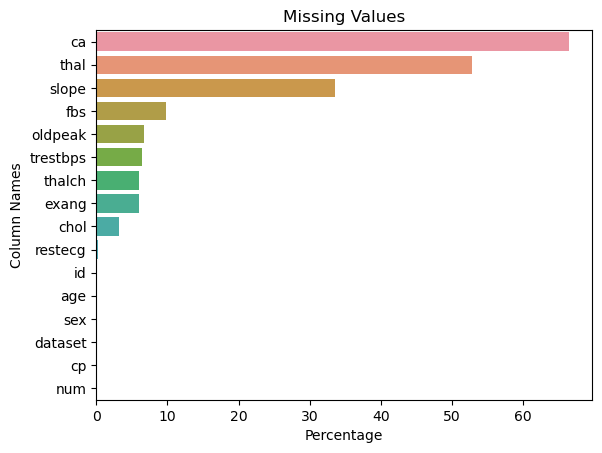

In [5]:
# Visualizing Missing values
sns.barplot(x= missing_percentage, y= missing_percentage.index)
plt.title("Missing Values")
plt.ylabel("Column Names")
plt.xlabel("Percentage")
plt.show()

In [6]:
# Identify the features of missing values
missing_data_cols= df.isnull().sum()[df.isnull().sum()>0].index.tolist()
missing_data_cols


['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [7]:
# Separtation of columns on basis of datatype
cat_cols= ['thal','slope','exang','restecg','fbs','cp','sex','num','ca']
bool_cols= ['fbs','exang']
numeric_cols= ['oldpeak','thalch','chol','age','trestbps']

In [8]:
# Function
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [9]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in cat_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass


Missing Values trestbps : 6.41%
MAE = 13.3557225433526 

RMSE = 17.285820377614932 

R2 = 0.06705124648792149 

Missing Values chol : 3.26%
MAE = 45.324831460674154 

RMSE = 64.54376091485301 

R2 = 0.6699899384500252 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.89352601156069 

RMSE = 21.734386914897645 

R2 = 0.31311489045717267 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5625755813953488 

RMSE = 0.787082000544667 

R2 = 0.4098017636486655 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [10]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Dealing with Outliers

In [11]:
# We will check the outliers for the numeric columns.
numeric_cols


['oldpeak', 'thalch', 'chol', 'age', 'trestbps']

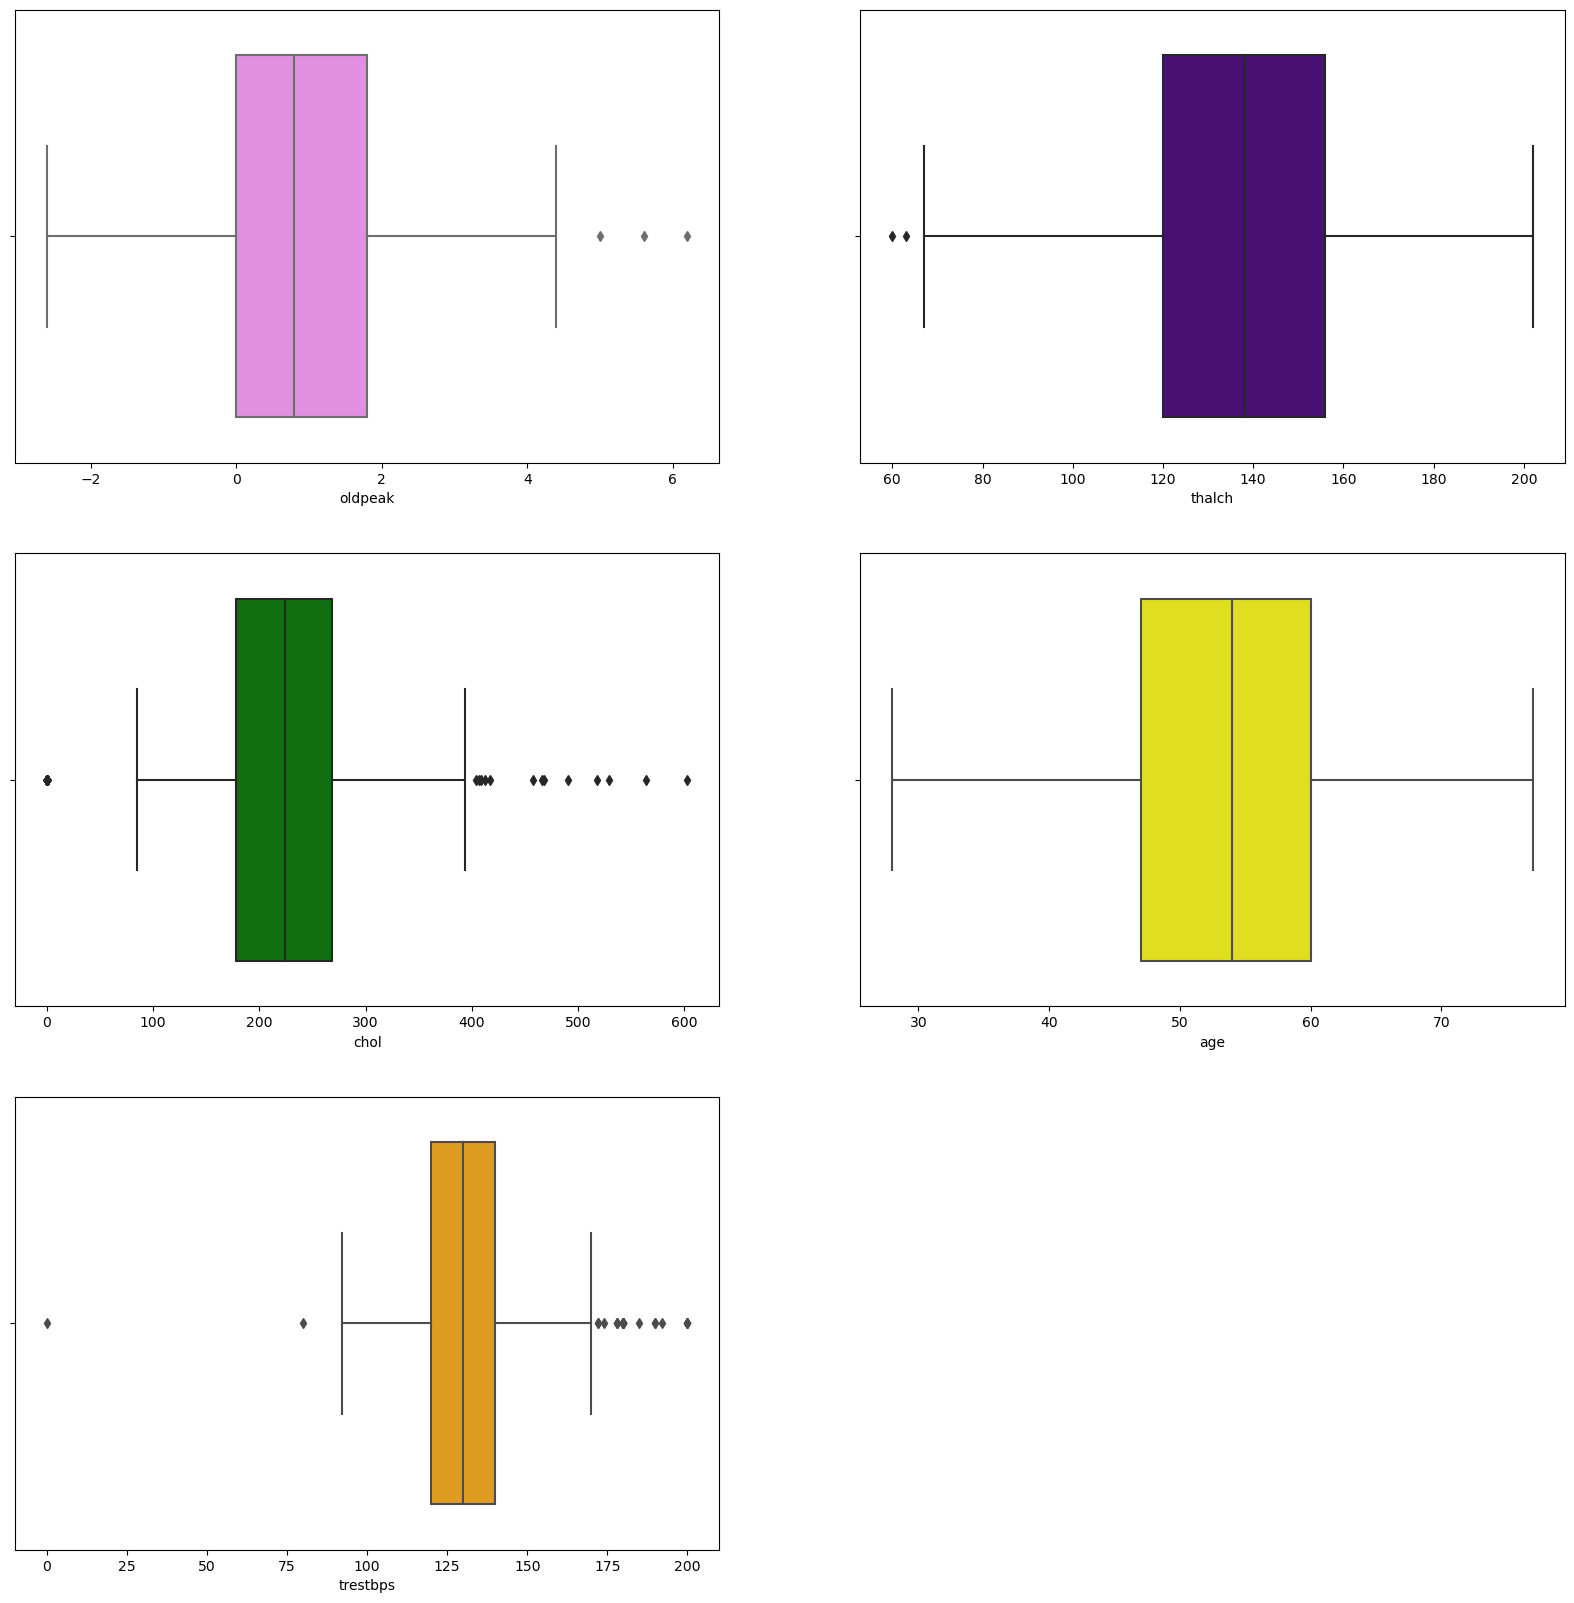

In [12]:
plt.figure(figsize=(20,20))

colors= ['violet','indigo','green','yellow','orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2,i+1)
    sns.boxplot(x=df[col], color= colors[i])
plt.show()

In [13]:
# Outlier in trestbps
print(f"The outlier in trestbps column is:")
df[df['trestbps']==0]

The outlier in trestbps column is:


id  age   sex        dataset           cp  trestbps  chol    fbs  \
753  754   55  Male  VA Long Beach  non-anginal       0.0   0.0  False   

    restecg  thalch  exang  oldpeak slope   ca               thal  num  
753  normal   155.0  False      1.5  flat  0.0  reversable defect    3

In [14]:
# removing the outlier
df=df[df['trestbps']!=0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


## Exploratory Data Analysis (EDA)
### Exploring each column

In [16]:
# Getting datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [17]:
# checking data shape
df.shape

(919, 16)

919 rows and 16 columns.
## Age column

In [18]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='Age', ylabel='No of patients'>

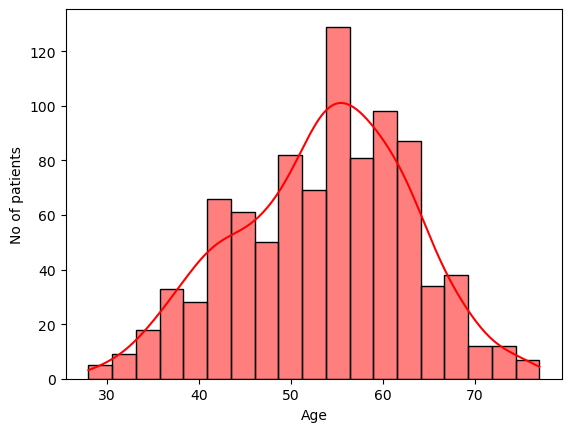

In [19]:
# Drawing a histogram to check the distribution of age of patients.
plt.xlabel('Age')
plt.ylabel('No of patients')
sns.histplot(data= df, x= 'age', color= 'red', kde= True)

In [20]:
# Mean of patients age.
print('Mean of patients age is',df['age'].mean(),'.')

# Median of patients age.
print('Median of patients age is ',df['age'].median(),'.')

# Mode of patients age.
print('Mode of patients age is ',df['age'].mode()[0],'.')

Mean of patients age is 53.50924918389554 .
Median of patients age is  54.0 .
Mode of patients age is  54 .


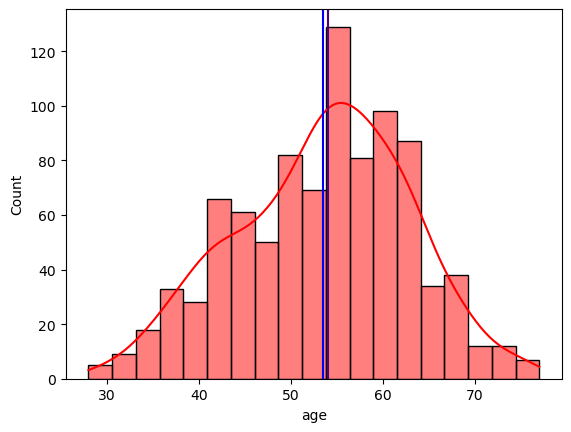

In [21]:
# plotting mean, median and mode of age column.
sns.histplot(df['age'], color= 'red', kde=True)
plt.axvline(df['age'].mean(), color='blue')
plt.axvline(df['age'].median(), color='yellow')
plt.axvline(df['age'].mode()[0], color='indigo')
plt.show()

## Sex column
Exploring the sex based distribution of patients for age column.

In [22]:
# No of male and female patients
df['sex'].value_counts()

sex
Male      725
Female    194
Name: count, dtype: int64

Male patients in percentage are 78.91%.
Female patients in percentage are 21.09%.
Males patients are 2.74 times greater than female.


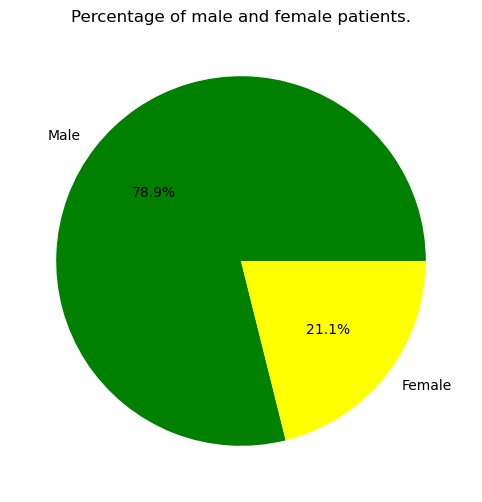

In [23]:
# Percentages of male and female patients
male_count= 726
female_count= 194
total_count= male_count+female_count

# pecentages
male_percentage= (male_count/total_count)*100
female_percentage= (female_count/total_count)*100

# results
print(f"Male patients in percentage are {male_percentage:.2f}%.")
print(f"Female patients in percentage are {female_percentage:.2f}%.")

# difference
difference_percentage= ((male_count - female_count)/ female_count)
print(f"Males patients are {difference_percentage:.2f} times greater than female.")

# pie chart showing the percentage of male and female patients.
plt.figure(figsize=(8,6))
plt.pie(df['sex'].value_counts(), autopct='%1.1f%%', labels= ['Male','Female'], colors= ['green','yellow'])
plt.title('Percentage of male and female patients.')
plt.show()

In [24]:
# Plotting histogram for age column and check the distribution of sex over it.
fig= px.histogram(data_frame= df, x= 'age', color='sex', barmode='group')
fig.show()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64


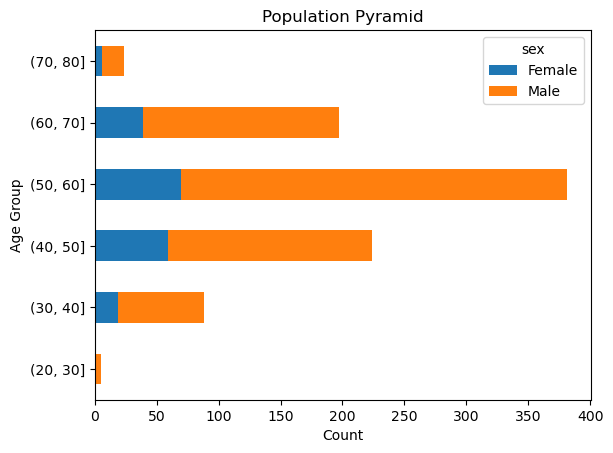

In [25]:
# no of female and male patients with respect to their age
age_sex_counts= df.groupby('sex')['age'].value_counts()
print(age_sex_counts)

# Plotting patients with respect to different assigned age groups
age_bins = range(0, df['age'].max() + 10, 10)
df['age_group'] = pd.cut(df['age'], bins=age_bins)
cross_tab = pd.crosstab(df['age_group'], df['sex'])
cross_tab.plot.barh(stacked=True)
plt.title('Population Pyramid')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

## dataset column

In [26]:
# Lets explore the dataset column

# Unique elements of dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

dataset
Cleveland        304
Hungary          293
VA Long Beach    199
Switzerland      123
Name: count, dtype: int64


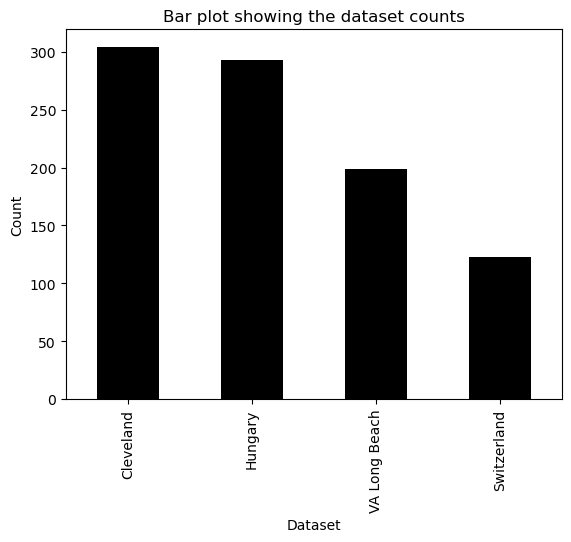

In [27]:
# Value counts of dataset column
print(df['dataset'].value_counts())

# Visualization of dataset values.
df['dataset'].value_counts().plot(kind= 'bar', color= 'black')
plt.title("Bar plot showing the dataset counts")
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

In [28]:
# Visualizing the percentage of dataset values with help of pie chart
plt.figure(figsize=(8,5))
px.pie(data_frame= df, names= 'dataset')

<Figure size 800x500 with 0 Axes>

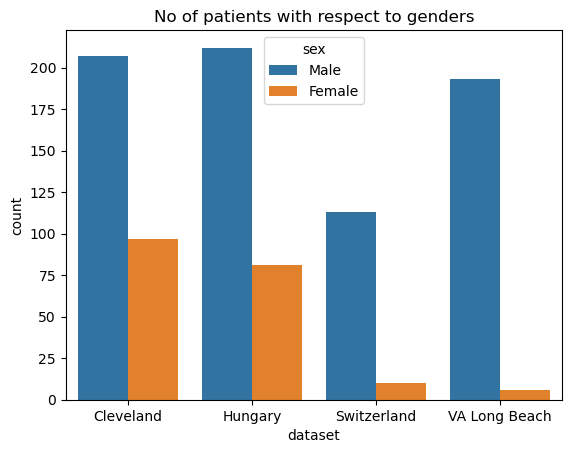

In [29]:
# Plotting countplot for dataset with respect to the Genders.
sns.countplot(data=df, x= 'dataset', hue= 'sex')
plt.title("No of patients with respect to genders")
plt.show()

In [30]:
# no of males and females as per dataset column
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    193
        Switzerland      113
Name: count, dtype: int64

In [31]:
age_grouped_dataset= df.groupby('age')['dataset'].value_counts().reset_index(name= 'count')
print(age_grouped_dataset)

     age        dataset  count
0     28      Cleveland      1
1     29        Hungary      2
2     29      Cleveland      1
3     30        Hungary      1
4     31        Hungary      2
..   ...            ...    ...
150   75  VA Long Beach      3
151   76  VA Long Beach      1
152   76      Cleveland      1
153   77      Cleveland      1
154   77  VA Long Beach      1

[155 rows x 3 columns]


In [32]:
# Plotting histogram for age column and check the distribution of dataset over it.
fig= px.histogram(data_frame= df, x= 'age', color='dataset')
fig.show()

# Mean, Median and Mode of the age column grouped by dataset column
print('MEAN')
print(df.groupby('dataset')['age'].mean())
print("=======================================")
print('MEDIAN')
print(df.groupby('dataset')['age'].median())
print("=======================================")
print('MODE')
print(df.groupby('dataset')['age'].agg(pd.Series.mode))


MEAN
dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.371859
Name: age, dtype: float64
MEDIAN
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
MODE
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


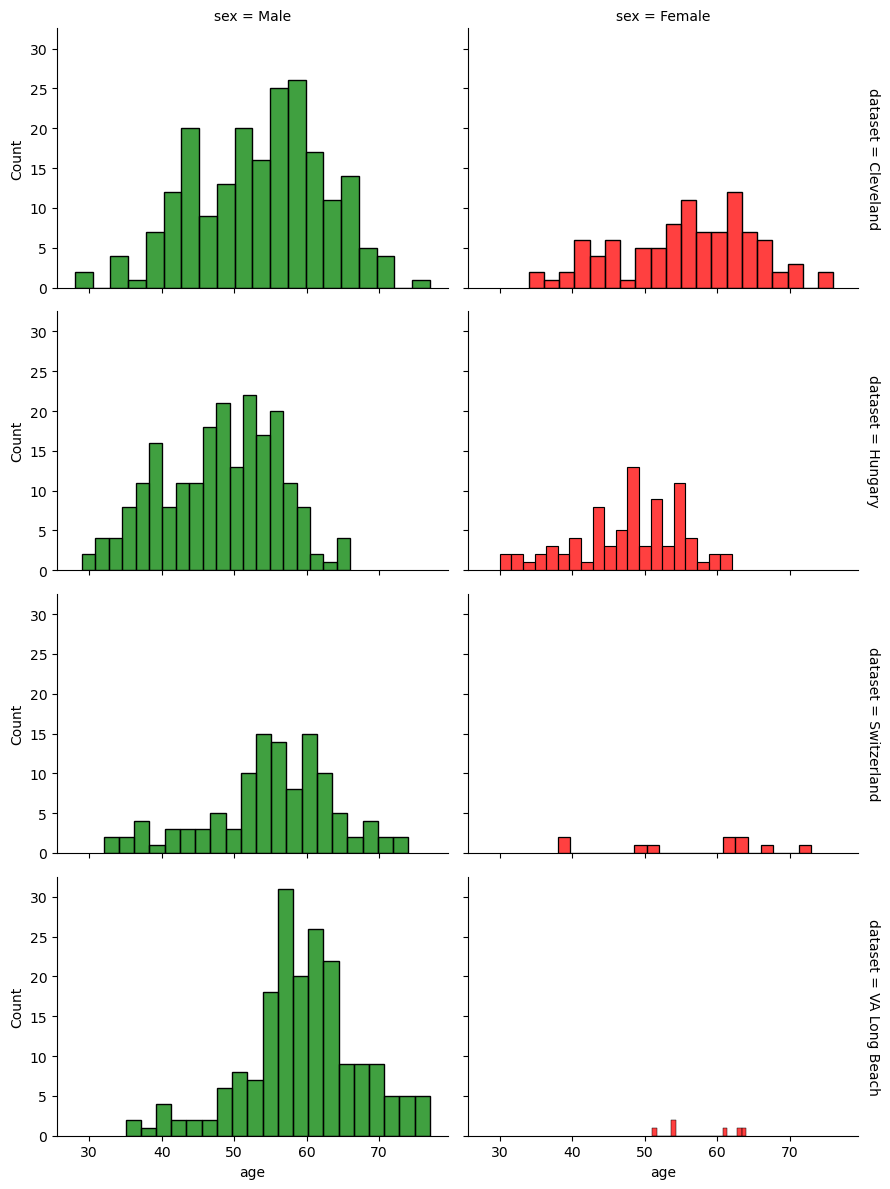

In [33]:
# Age distribution by sex and dataset
g = sns.FacetGrid(df, row='dataset', col='sex', margin_titles=True, height=3, aspect=1.5, hue= 'sex', palette={'Male':'green','Female':'red'})
g.map(sns.histplot, 'age', bins=20, kde=False)

## cp column (Chest Pain)

cp
asymptomatic       496
non-anginal        203
atypical angina    174
typical angina      46
Name: count, dtype: int64


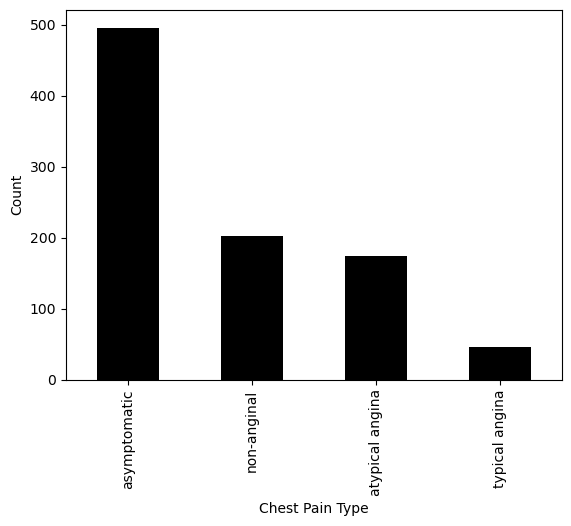

In [34]:
# No of patients with respect to chest pain type 
print(df['cp'].value_counts())

# Barplot showing the no of patients with respect to chest pain
df['cp'].value_counts().plot(kind='bar', color='black',)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='cp', ylabel='count'>

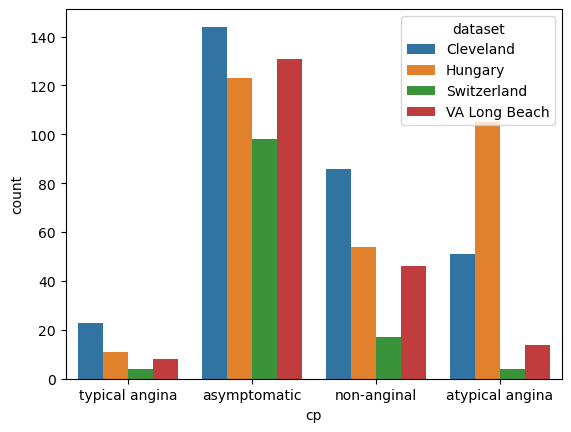

In [35]:
# Countplot for cp column for different datasets
sns.countplot(df, x='cp', hue='dataset')

<Axes: xlabel='cp', ylabel='count'>

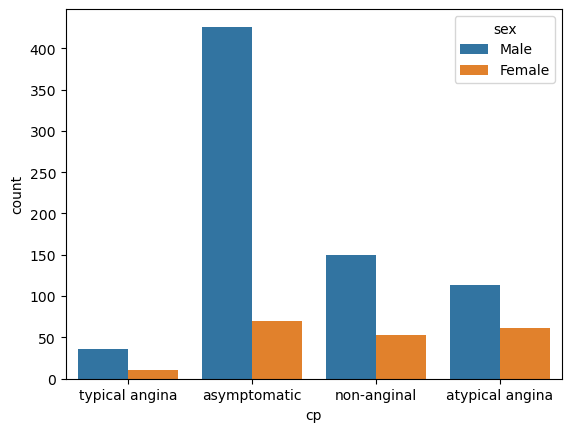

In [36]:
# Countplot for cp column for genders
sns.countplot(df, x='cp', hue='sex')

In [37]:
# Visualization of age column grouped by cp
fig= px.histogram(data_frame= df, x= 'age', color='cp', title= "Chest pain in different age groups")
fig.show()


## trestbpd (resting blood pressure) column:
The normal resting blood pressure is 120/80 mm Hg.

In [38]:
df['trestbps'].info()

<class 'pandas.core.series.Series'>
Index: 919 entries, 0 to 919
Series name: trestbps
Non-Null Count  Dtype  
--------------  -----  
919 non-null    float64
dtypes: float64(1)
memory usage: 14.4 KB


In [39]:
# Description of trestbps column
df['trestbps'].describe()

count    919.000000
mean     132.624037
std       18.037686
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

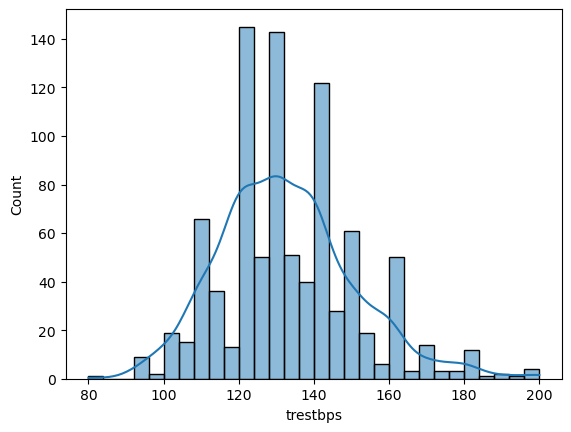

In [40]:
# Histogram for trestbps column
sns.histplot(df['trestbps'], kde= True)

In [41]:
# Mean of trestbps
print('Mean of trestbps of patients is', df['trestbps'].mean(),'.')

# Median of trestbps
print('Median of trestbps of patients is', df['trestbps'].median(),'.')

# Mode of trestbps
print('Mode of trestbps of patients is', df['trestbps'].mode()[0],'.')

Mean of trestbps of patients is 132.62403699673558 .
Median of trestbps of patients is 130.0 .
Mode of trestbps of patients is 120.0 .


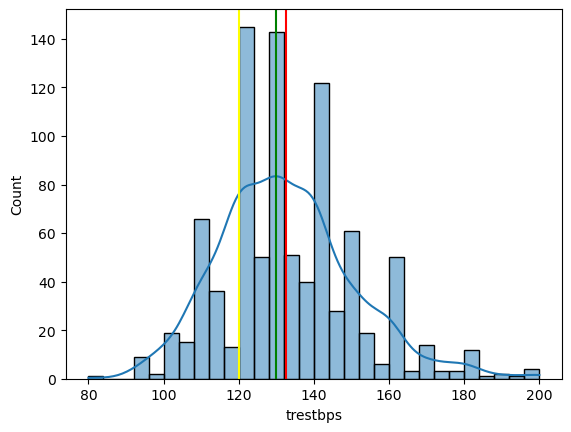

In [42]:
# Plotting mean, median and mode of trestbps column
sns.histplot(df['trestbps'], kde= True)
plt.axvline(df['trestbps'].mean(), color='red')
plt.axvline(df['trestbps'].median(), color='green')
plt.axvline(df['trestbps'].mode()[0], color='yellow')
plt.show()

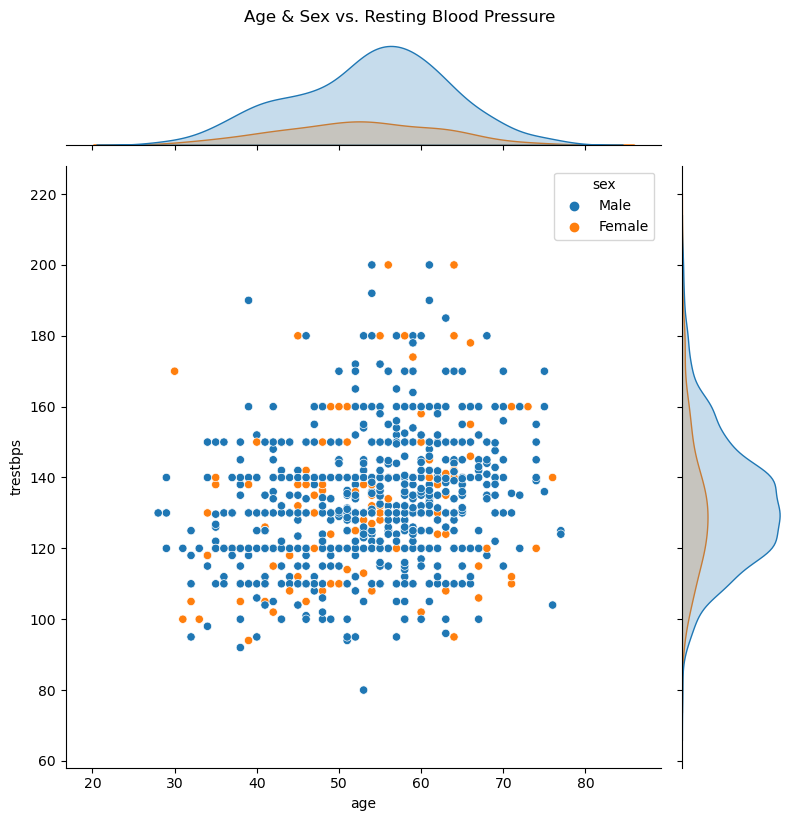

In [43]:
# Visualizing trestbps for all the age groups and for both the genders
sns.jointplot(data=df, x='age', y='trestbps', hue='sex', kind='scatter', height=8)
plt.suptitle('Age & Sex vs. Resting Blood Pressure', y=1.02)  # Adjust title position
plt.show()

In [44]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_group'],
      dtype='object')

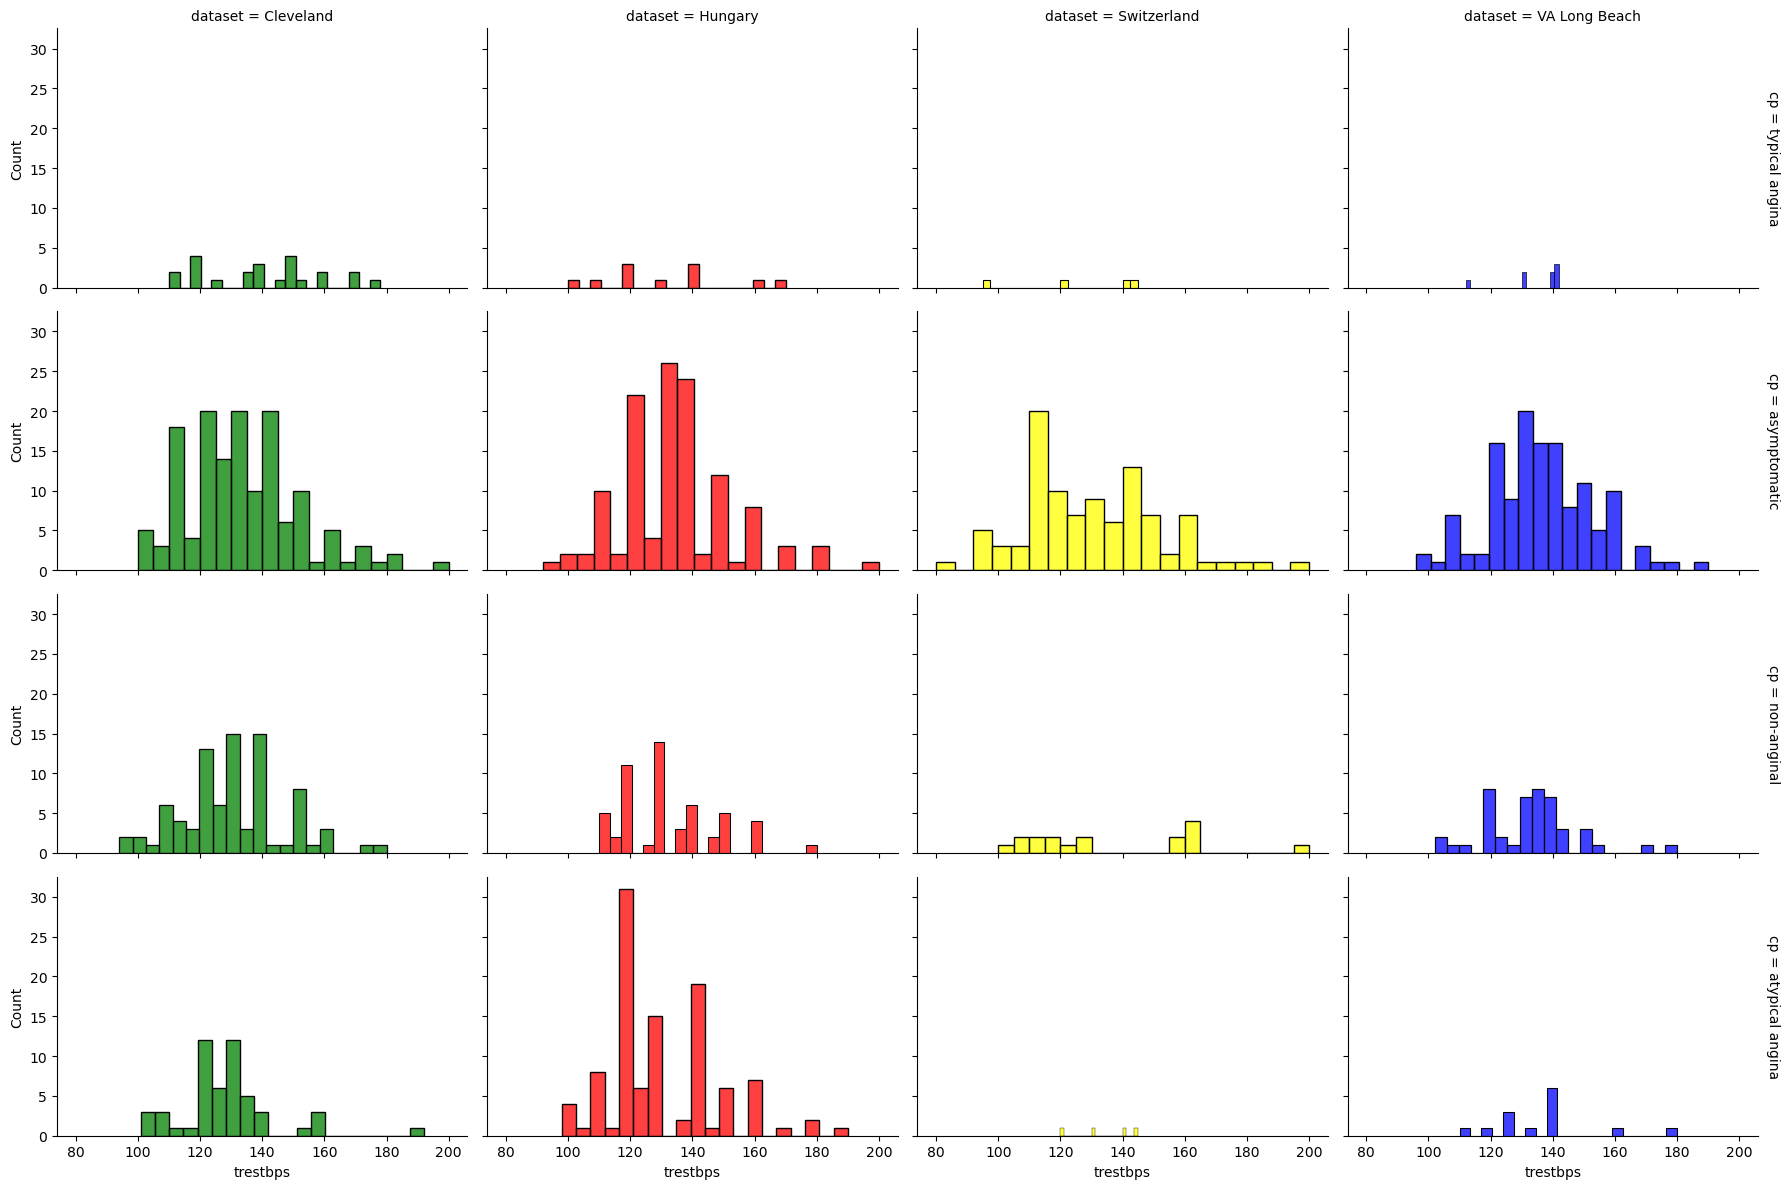

In [45]:
# Age distribution by sex and dataset
g = sns.FacetGrid(df, row='cp', col='dataset', margin_titles=True, height=3, aspect=1.5, hue= 'dataset', palette={'Cleveland':'green','Hungary':'red','Switzerland':'yellow','VA Long Beach':'blue'})
g.map(sns.histplot, 'trestbps', bins=20, kde=False)
plt.show()

In [46]:
df['trestbps']

0      145.00
1      160.00
2      120.00
3      130.00
4      130.00
        ...  
915    127.00
916    139.56
917    122.00
918    152.51
919    120.00
Name: trestbps, Length: 919, dtype: float64

## chol column (cholesterol):

In [47]:
df['chol'].info()

<class 'pandas.core.series.Series'>
Index: 919 entries, 0 to 919
Series name: chol
Non-Null Count  Dtype  
--------------  -----  
919 non-null    float64
dtypes: float64(1)
memory usage: 14.4 KB


In [48]:
# min and max value of chol
df['chol'].min(), df['chol'].max() 

(0.0, 603.0)

<Axes: xlabel='chol', ylabel='Count'>

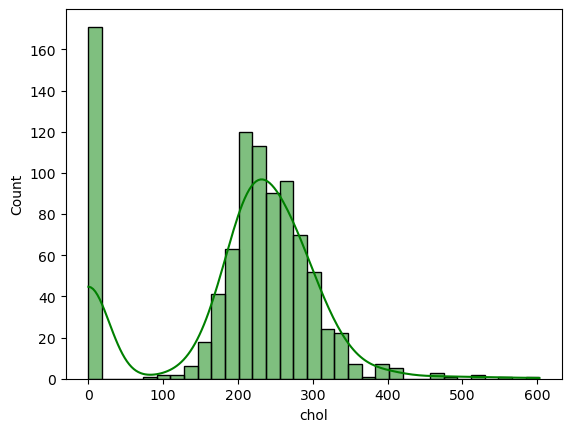

In [49]:
# Distribution of chol values
sns.histplot(df['chol'],kde=True, color= 'green')

Mean of chol column is: 200.8089336235038.
Mean of chol column is: 224.0.
Mode of chol column is: 0.0.


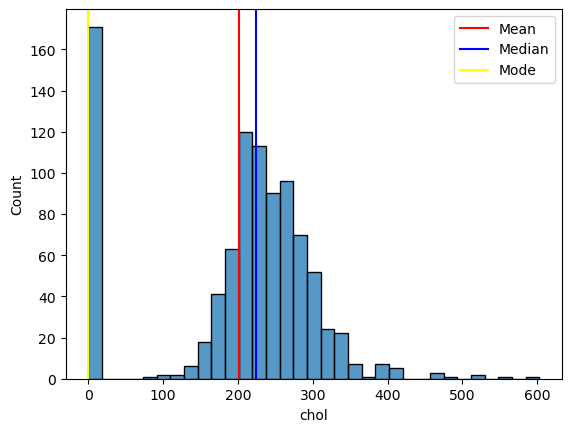

In [50]:
# Mean of chol
mean= df['chol'].mean()
print(f'Mean of chol column is: {mean}.')

# Median of chol
median= df['chol'].median()
print(f'Mean of chol column is: {median}.')

# Mode of chol
mode= df['chol'].mode()[0]
print(f'Mode of chol column is: {mode}.')

# Visualization of mean, median and mode of chol
sns.histplot(df['chol'],kde=False)
plt.axvline(mean, color='red')
plt.axvline(median, color='blue')
plt.axvline(mode, color='yellow')
plt.legend({'Mean','Median', 'Mode'})
plt.show()

In [51]:
# Visualization of cholesterol in different ages
px.scatter(data_frame=df, x='age', y='chol', color='sex')

In [52]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_group'],
      dtype='object')

In [53]:
# chol distribution by dataset and trestbps
px.scatter(data_frame= df, x='trestbps', y='chol', color='dataset')

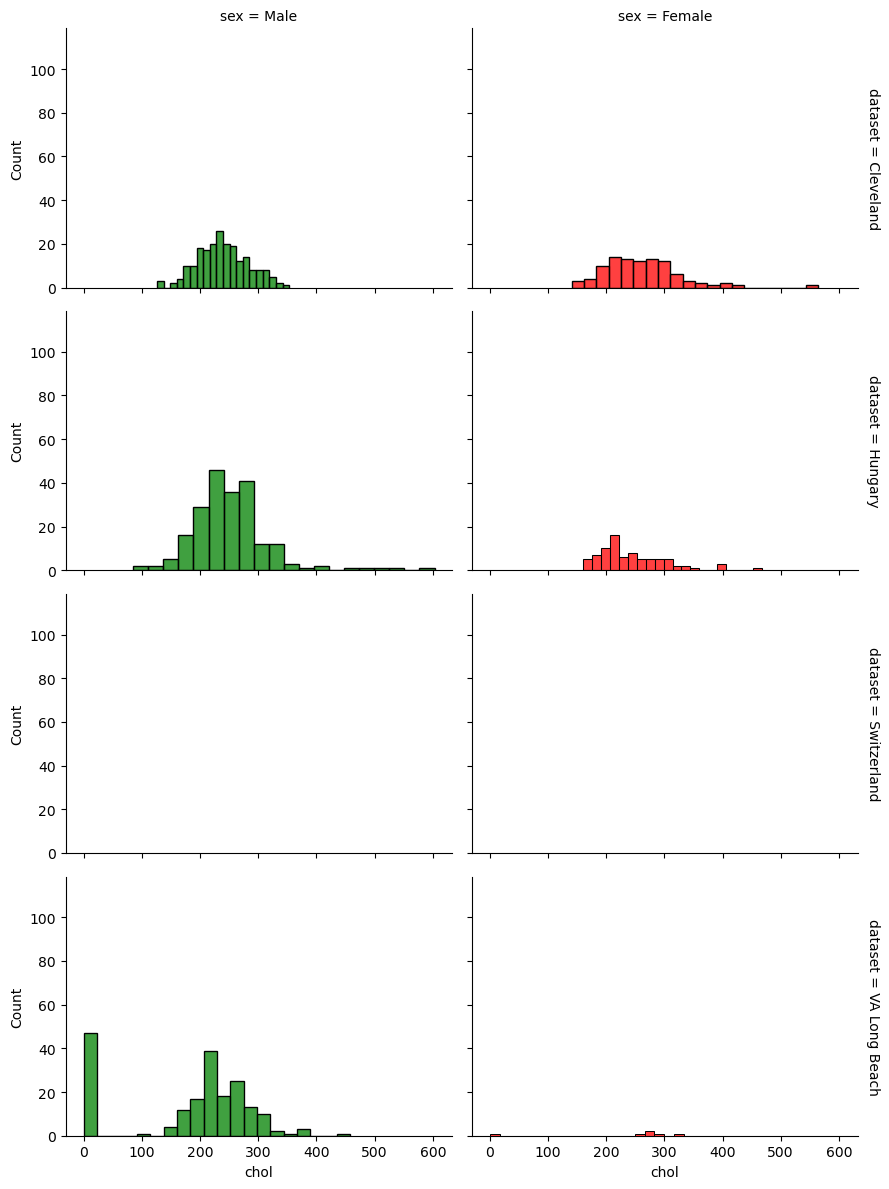

In [54]:
# chol distribution by dataset and sex
g= sns.FacetGrid(df, row='dataset', col='sex', margin_titles= True, height=3, aspect=1.5, hue='sex',palette={'Male':'green','Female':'red'})
g.map(sns.histplot, 'chol', bins= 20, kde=False)

## fbs column
 A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

In [55]:
df['fbs'].value_counts()

fbs
False    781
True     138
Name: count, dtype: int64

<Axes: xlabel='fbs'>

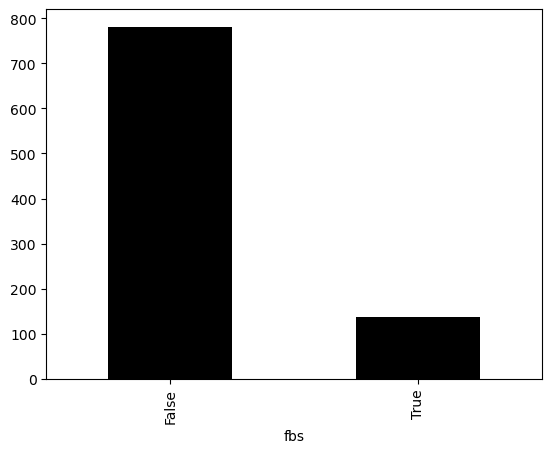

In [56]:
#
df['fbs'].value_counts().plot(kind='bar',color='black')

fbs    age
False  54     45
       58     33
       55     33
       57     31
       52     31
              ..
True   70      1
       39      1
       40      1
       42      1
       45      1
Name: count, Length: 82, dtype: int64


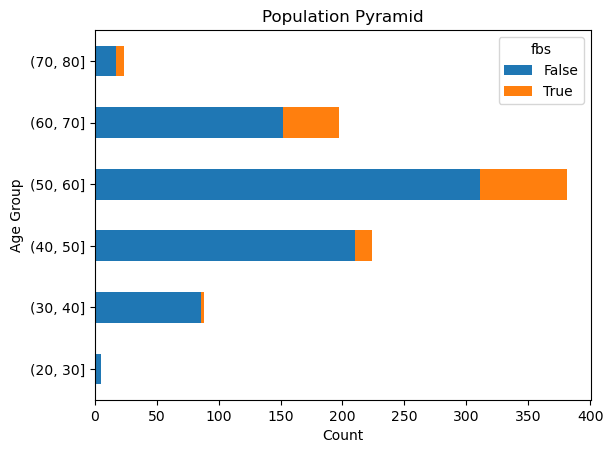

In [57]:
# fbs distribution among age
fb_age_count= df.groupby('fbs')['age'].value_counts()
print(fb_age_count)

# plotting patients fbs with respect to age
age_bins = range(0, df['age'].max() + 10, 10)
df['age_group'] = pd.cut(df['age'], bins=age_bins)
cross_tab = pd.crosstab(df['age_group'], df['fbs'])
cross_tab.plot.barh(stacked=True)
plt.title('Population Pyramid')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

<Axes: xlabel='dataset', ylabel='count'>

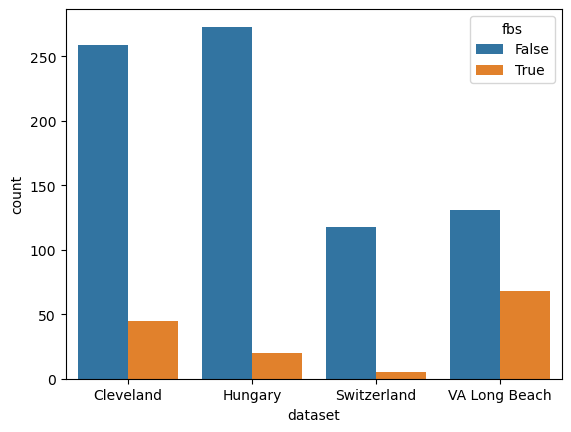

In [58]:
sns.countplot(data=df, x='dataset', hue='fbs')

<Axes: xlabel='sex', ylabel='count'>

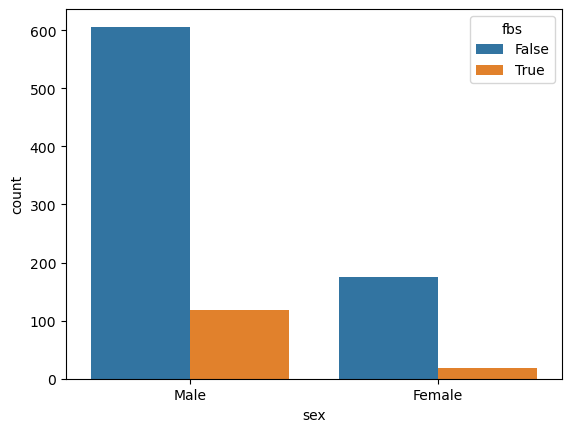

In [59]:
sns.countplot(data=df, x='sex', hue='fbs')

<Axes: xlabel='fbs', ylabel='count'>

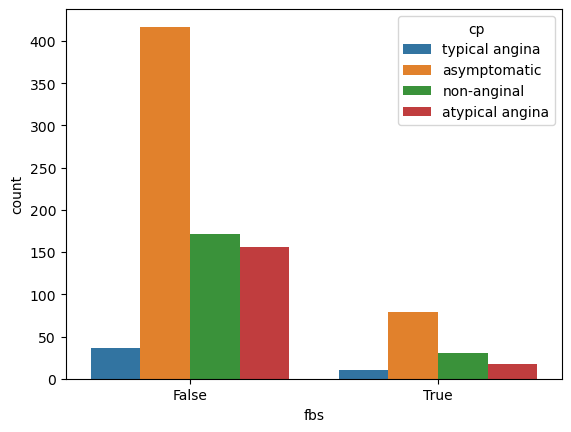

In [60]:
sns.countplot(data=df, x='fbs', hue='cp')

In [61]:
px.scatter(data_frame=df, x='chol', y='trestbps', color='fbs')

## restecg column (resting electrocardiographic results)

In [62]:
# value counts of restecg
df['restecg'].value_counts()

restecg
normal              552
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

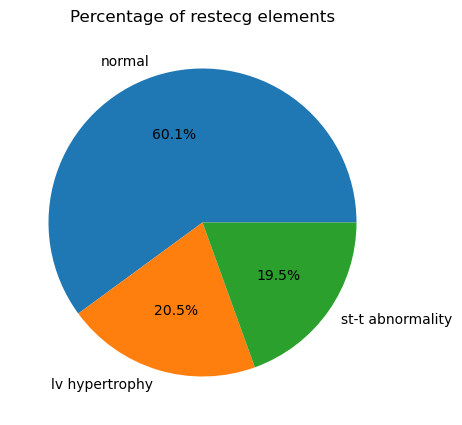

In [63]:
# pie plot showing the percentage of restecg
plt.figure(figsize=(8,5))
plt.pie(df['restecg'].value_counts(), autopct= "%1.1f%%", labels= ['normal','lv hypertrophy','st-t abnormality'])
plt.title("Percentage of restecg elements")
plt.show()

Distribution of restecg among age is:
 restecg           age
lv hypertrophy    58     16
                  56     11
                  60      9
                  51      9
                  53      9
                         ..
st-t abnormality  30      1
                  31      1
                  34      1
                  40      1
                  77      1
Name: count, Length: 130, dtype: int64


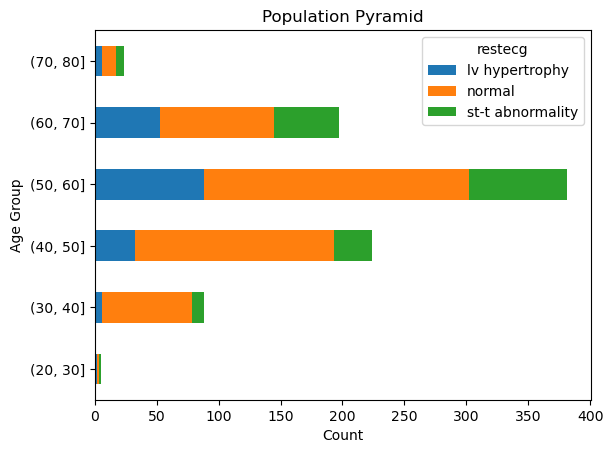

In [64]:
# restecg distribution among age
age_recg= df.groupby('restecg')['age'].value_counts()
print(f"Distribution of restecg among age is:\n {age_recg}")

# plotting restecg with respect to age:
cross_tab= pd.crosstab(df['age_group'], df['restecg'])
cross_tab.plot.barh(stacked= True)
plt.title("Population Pyramid")
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

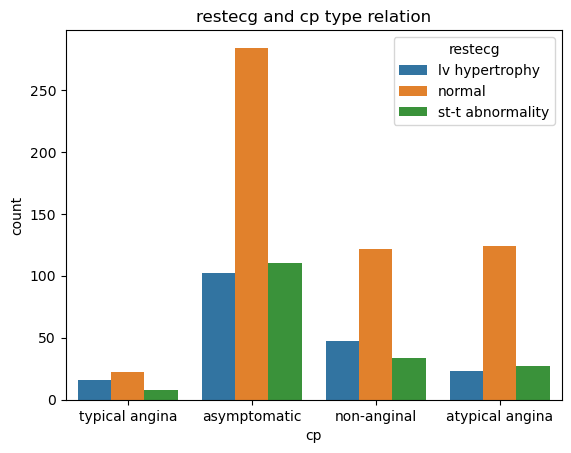

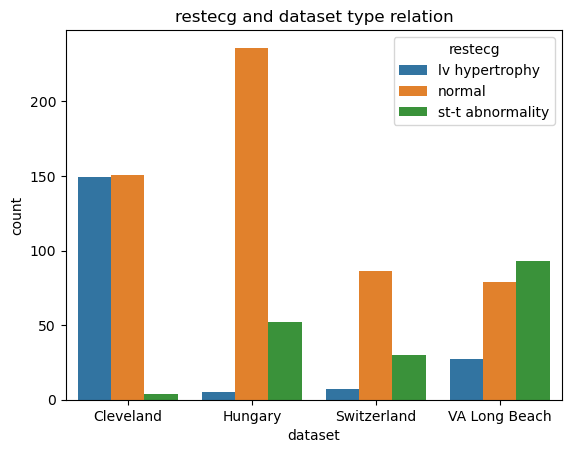

In [65]:
# plot showing relation between cp type and restecg
sns.countplot(data=df, x='cp', hue='restecg')
plt.title('restecg and cp type relation')
plt.show()

# plot showing relation between dataset type and restecg
sns.countplot(data=df, x='dataset', hue='restecg')
plt.title('restecg and dataset type relation')
plt.show()

In [66]:
# plot showing the distribution of restecg by chol and trestbps
px.scatter(data_frame=df, x='chol', y='trestbps', color='restecg')

## thalch column (Maximum Heart Rate Achieved)

In [67]:
df['thalch'].dtype

dtype('float64')

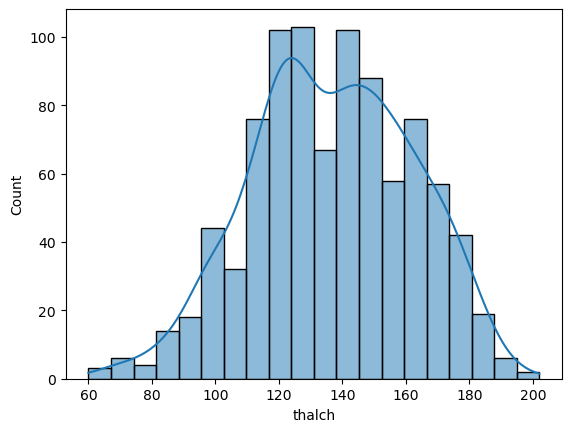

In [68]:
# Distribution of thalch
sns.histplot(df['thalch'], kde= True)
plt.show()

Mean of thalch column is 136.709162132753
Median of thalch column is 138.0
Mode of thalch column is 150.0


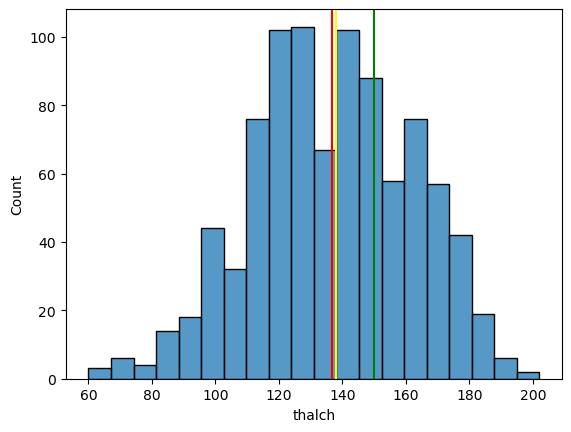

In [69]:
# mean, median and mode of thalch column
mean_thalch= df['thalch'].mean()
print(f'Mean of thalch column is {mean_thalch}')

median_thalch= df['thalch'].median()
print(f'Median of thalch column is {median_thalch}')

mode_thalch= df['thalch'].mode()[0]
print(f'Mode of thalch column is {mode_thalch}')

# plotting mean, median and mode
sns.histplot(df['thalch'], kde= False)
plt.axvline(mean_thalch, color='red')
plt.axvline(median_thalch, color='yellow')
plt.axvline(mode_thalch, color='green')
plt.show()

In [70]:
# Create a mapping of sex to colors
color_map = {'Male': 'blue', 'Female': 'red'}

# Map the 'sex' column to colors
df['color'] = df['sex'].map(color_map)

In [71]:
# plotting thalch relation with other columns in scatter plots
fig= make_subplots(rows=3, cols=1)

# First scatter plot
fig.add_trace(
    go.Scatter(x= df['thalch'], y=df['age'], mode='markers', marker= dict(color=df['color']), name='Chol vs Age'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x= df['thalch'], y=df['trestbps'], mode='markers', marker= dict(color=df['color']), name='Chol vs trestbps'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x= df['thalch'], y=df['chol'], mode='markers', marker= dict(color=df['color']), name='Chol vs Thalch'),
    row=3, col=1
)


fig.update_layout(height=1200, title_text="Scatter Plots of Thalach Relationships on sex basis")
fig.show()

In [72]:
# scatterplot showing the dataset for age and thalch.
px.scatter(data_frame=df, x= 'thalch', y='age', color='dataset')

In [73]:
# scatterplot showing the cp for trestbps and thalch.
px.scatter(data_frame=df, x= 'thalch', y='trestbps', color='cp')

In [74]:
# scatterplot showing the restecg for chol and thalch.
px.scatter(data_frame=df, x= 'thalch', y='chol', color='restecg')

## exang column (exercise induced agina)

In [75]:
df['exang'].value_counts()

exang
False    543
True     376
Name: count, dtype: int64

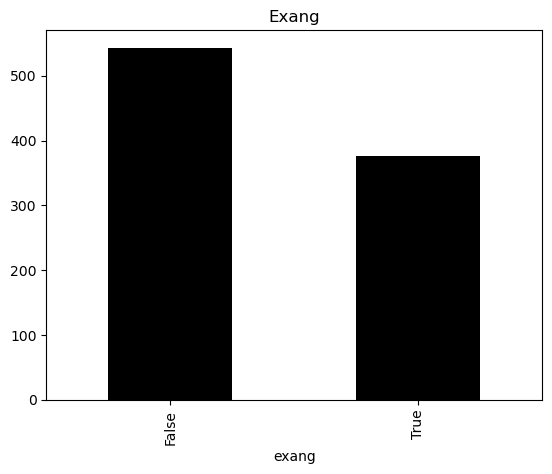

In [76]:
df['exang'].value_counts().plot(kind='bar', color='black')
plt.title('Exang')
plt.show()

In [77]:
# Pie chart showing the percentage of exang results
px.pie(data_frame=df, names='exang')

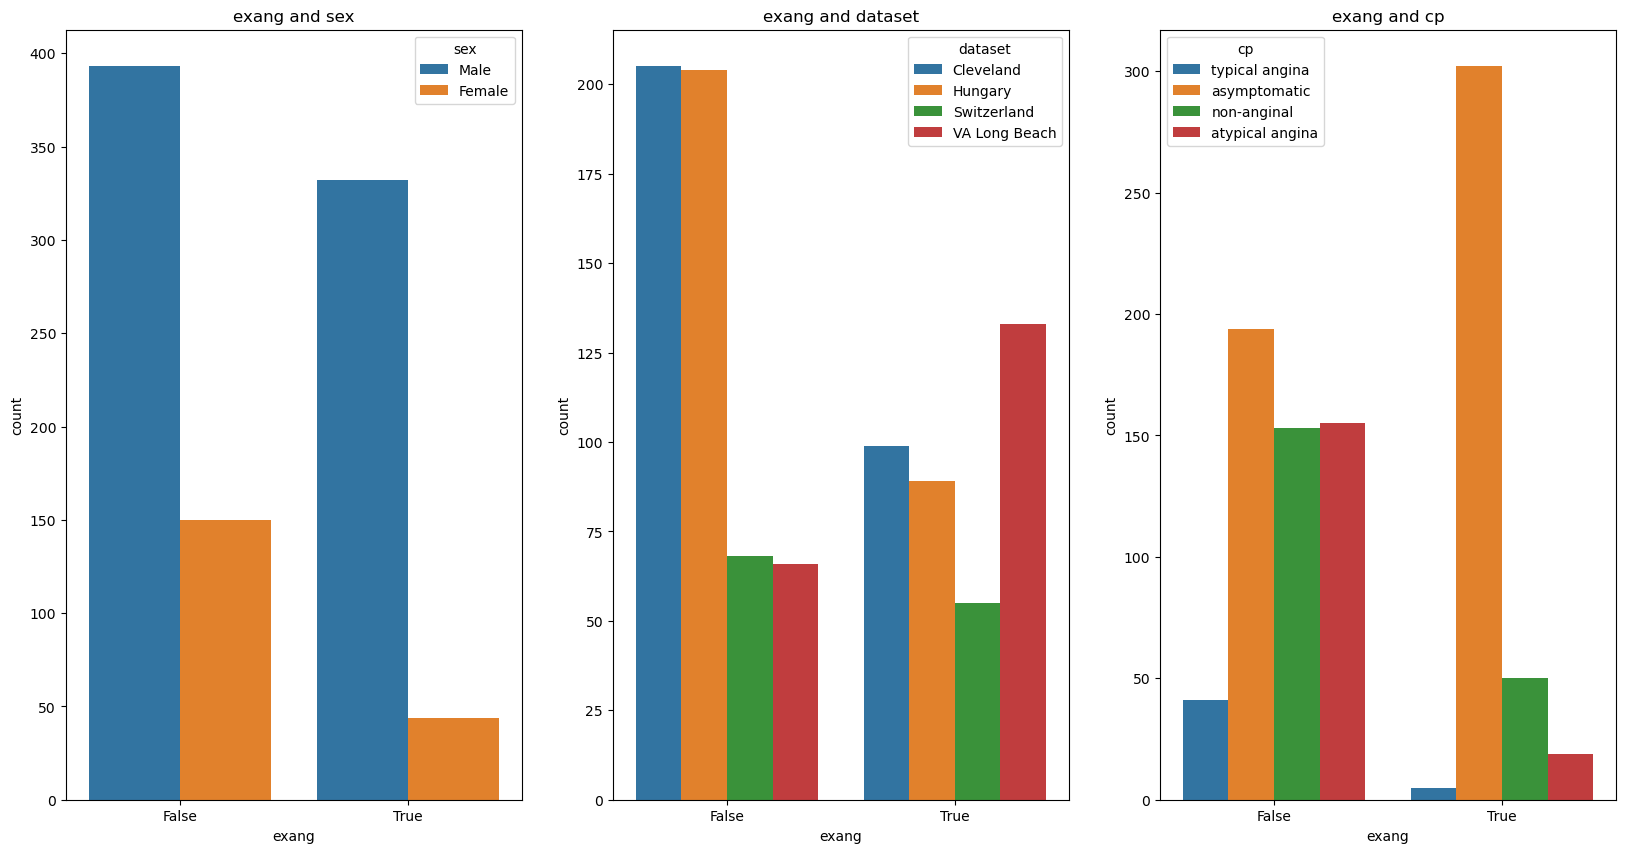

In [78]:
# countplots showing the number relation of exang with sex, dataset and cp.
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.countplot(df, x='exang', hue='sex')
plt.title('exang and sex')

plt.subplot(1,3,2)
sns.countplot(df, x='exang', hue='dataset')
plt.title('exang and dataset')

plt.subplot(1,3,3)
sns.countplot(df, x='exang', hue='cp')
plt.title('exang and cp')

plt.show()

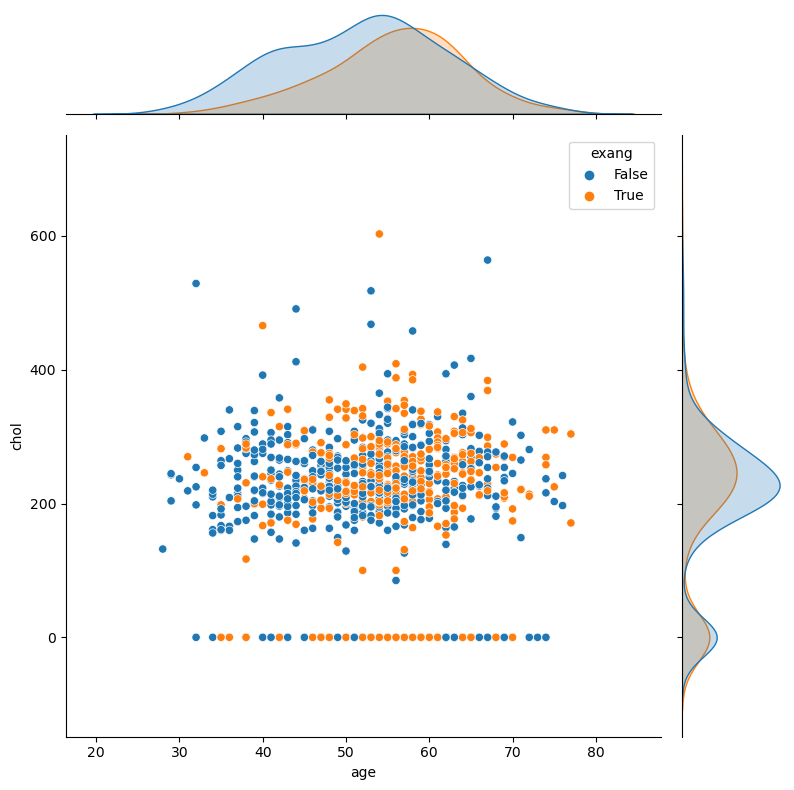

In [79]:
sns.jointplot(data=df, x='age', y='chol', hue='exang', kind= 'scatter', height=8)
plt.show()

<Axes: xlabel='fbs', ylabel='count'>

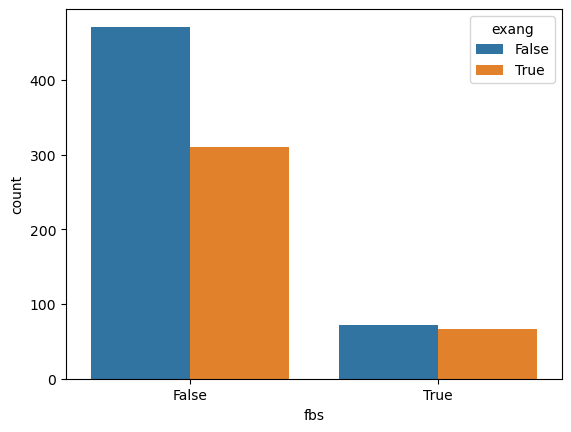

In [80]:
# countplot of fbs and exang
sns.countplot(df, x='fbs', hue='exang')

<Axes: xlabel='restecg', ylabel='count'>

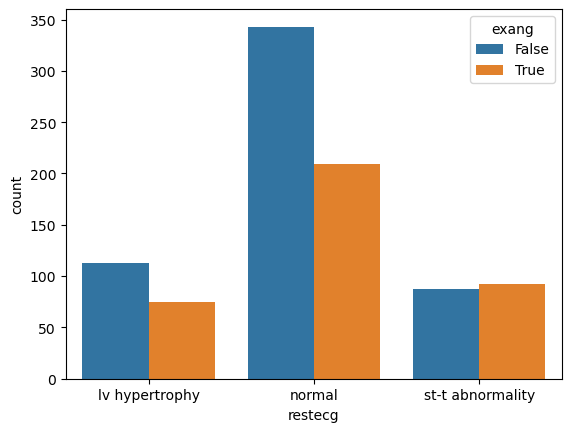

In [81]:
# countplot of fbs and exang
sns.countplot(df, x='restecg', hue='exang')

In [82]:
# Plotting histogram for 
fig= px.histogram(data_frame=df, x='thalch', color='exang')
fig.show()

## oldpeak column
Between zero and 1, the oldpeak is normal but greater than 1 shows the abnormality.

In [83]:
# Max and Min of oldpeak values
df['oldpeak'].max(), df['oldpeak'].min() 

(6.2, -2.6)

<Axes: ylabel='Density'>

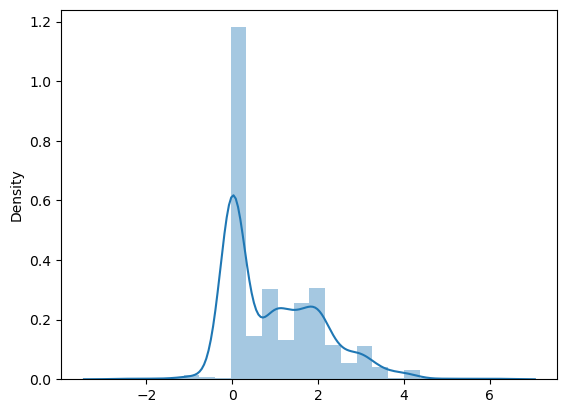

In [84]:
# distribution of oldpeak values
sns.distplot(x=df['oldpeak'])

In [85]:
# distribution of oldpeak values for both genders
fig=px.histogram(data_frame= df, x='oldpeak', color='sex')
fig.show()

Mean of oldpeak is: 0.9667823721436344.
Median of oldpeak is: 0.8.
Mode of oldpeak is: 0.0.


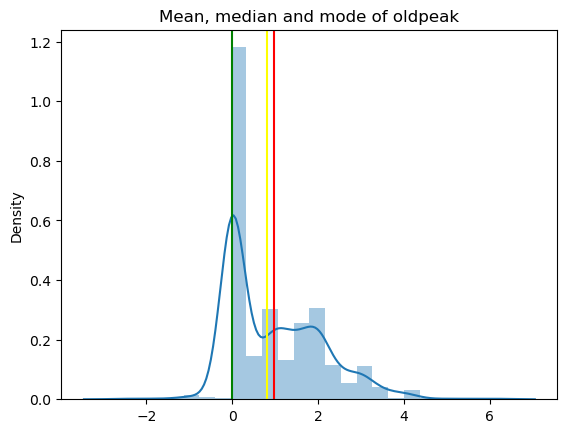

In [86]:
# mean, median and mode of the oldpeak values
# Mean
mean_oldpeak= df['oldpeak'].mean()
print(f'Mean of oldpeak is: {mean_oldpeak}.')

# Mean
median_oldpeak= df['oldpeak'].median()
print(f'Median of oldpeak is: {median_oldpeak}.')

# Mode
mode_oldpeak= df['oldpeak'].mode()[0]
print(f'Mode of oldpeak is: {mode_oldpeak}.')

# visualization of mean, median and mode
sns.distplot(x=df['oldpeak'])
plt.axvline(mean_oldpeak, color='red')
plt.axvline(mode_oldpeak, color='green')
plt.axvline(median_oldpeak, color='yellow')
plt.title("Mean, median and mode of oldpeak")
plt.show()

In [87]:
# Relation of oldpeak to age and sex
px.scatter(data_frame=df, x='oldpeak', y='age', color='sex')

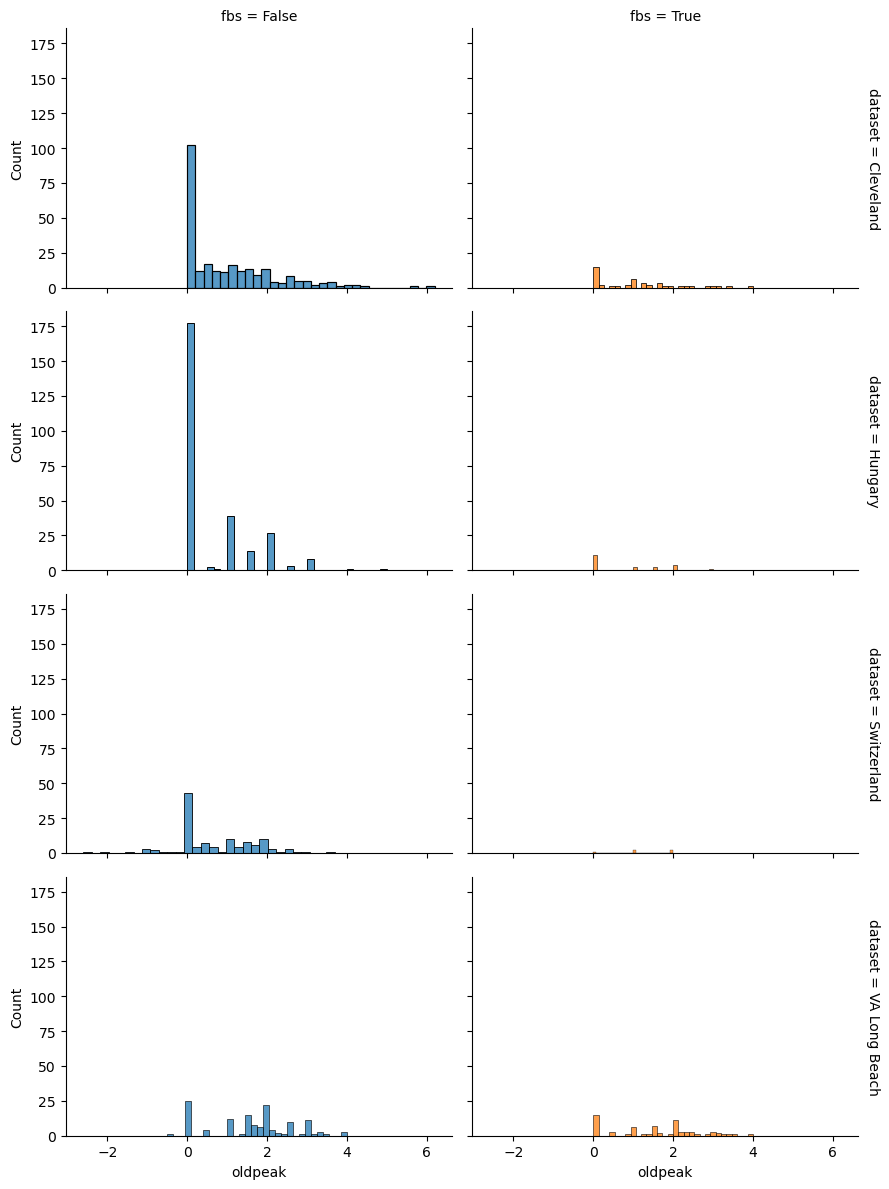

In [88]:
# oldpeak distribution along dataset and fbs.
g= sns.FacetGrid(df, row='dataset', col='fbs', margin_titles=True, height=3, aspect= 1.5, hue='fbs')
g.map(sns.histplot, 'oldpeak', bins=30, kde= False)

In [89]:
# Relation of oldpeak to trestbps and cp
px.scatter(data_frame=df, x='oldpeak',y='trestbps', color='cp')

In [90]:
# relation of oldpeak to chol and restecg
px.scatter(data_frame=df, x='oldpeak', y='chol', color='restecg')

In [91]:
# plot for oldpeak and exang
fig= px.histogram(data_frame=df, x='oldpeak', color='exang')
fig.show()

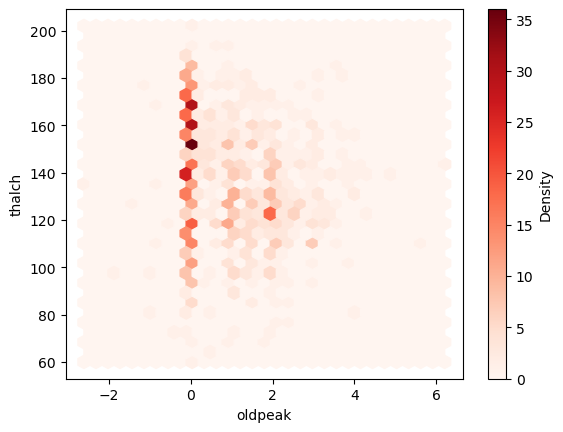

In [92]:
# Plot showing relation between oldpeak and thalch
plt.hexbin(df['oldpeak'], df['thalch'], gridsize=30, cmap='Reds')
plt.xlabel('oldpeak')
plt.ylabel('thalch')
cb = plt.colorbar(label='Density')

## slope column
##### Flat:
Flat ST segments can be indicative of significant coronary artery disease (CAD), especially if they occur at low levels of exercise, are accompanied by symptoms like chest pain (angina), or are associated with a drop in blood pressure.

##### upsloping:
While upsloping ST segments are usually seen as normal or at least not indicative of severe ischemia, the clinical context and other ECG findings must also be considered.

##### downsloping:
Downsloping ST segments during or immediately after exercise are taken very seriously, as they can indicate a high risk of CAD.

In [93]:
# Value counts of slope
df['slope'].value_counts()

slope
flat           548
upsloping      292
downsloping     79
Name: count, dtype: int64

<Axes: xlabel='slope'>

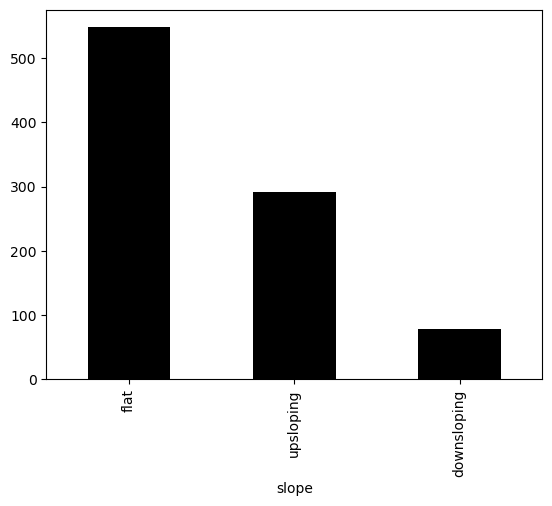

In [94]:
# plotting slope value counts
df['slope'].value_counts().plot(kind='bar', color= 'black')

slope        age
downsloping  56     8
             61     7
             62     7
             59     5
             64     4
                   ..
upsloping    70     1
             73     1
             69     1
             31     1
             28     1
Name: count, Length: 122, dtype: int64


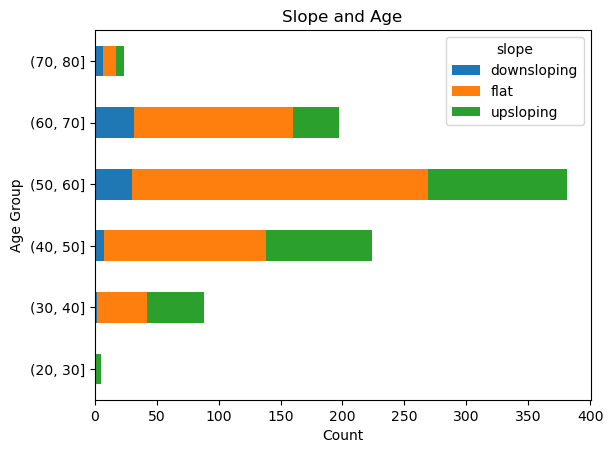

In [95]:
# Slope distribution among different age
age_slope_count= df.groupby('slope')['age'].value_counts()
print(age_slope_count)

# Plotting slope behaviour among different age groups
cross_tab= pd.crosstab(df['age_group'], df['slope'])
cross_tab.plot.barh(stacked= True)
plt.title('Slope and Age')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

<Axes: xlabel='slope', ylabel='count'>

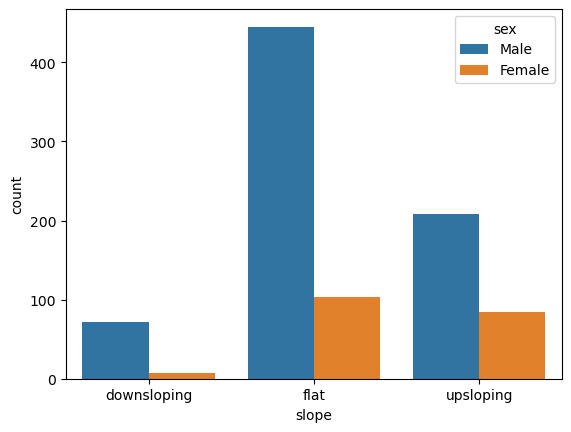

In [96]:
# ploting countplot for slope with respect to gender
sns.countplot(data=df, x='slope', hue='sex')

<Axes: xlabel='slope', ylabel='count'>

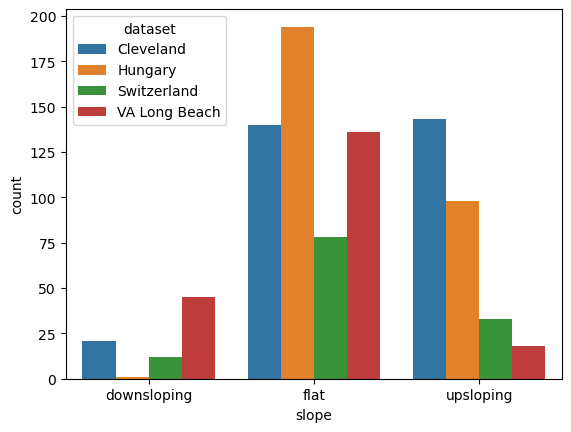

In [97]:
# # ploting countplot for slope with respect to dataset
sns.countplot(data=df, x='slope', hue='dataset')

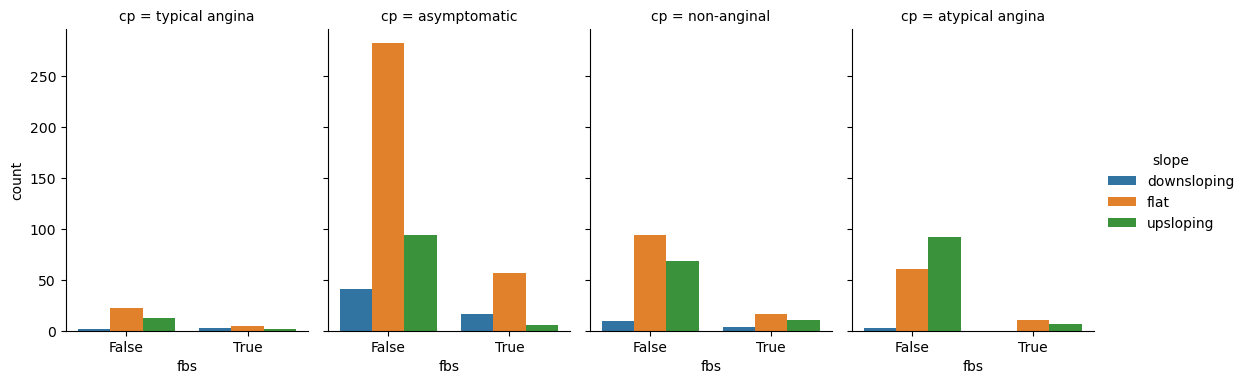

In [98]:
# Plot showing relation between fbs, slope and cp.
sns.catplot(x='fbs', hue='slope', col='cp', data=df, kind='count', height=4, aspect=.7)
plt.subplots_adjust(top=0.9)


In [99]:
# Scatter plot showing relation of slope with chol and trestbps.
px.scatter(data_frame=df, x='trestbps', y='chol', color='slope')

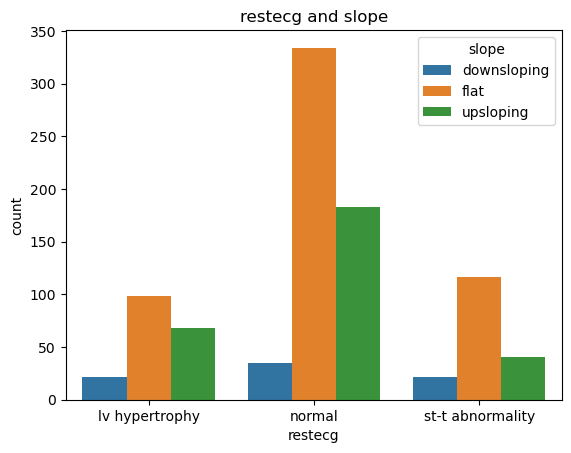

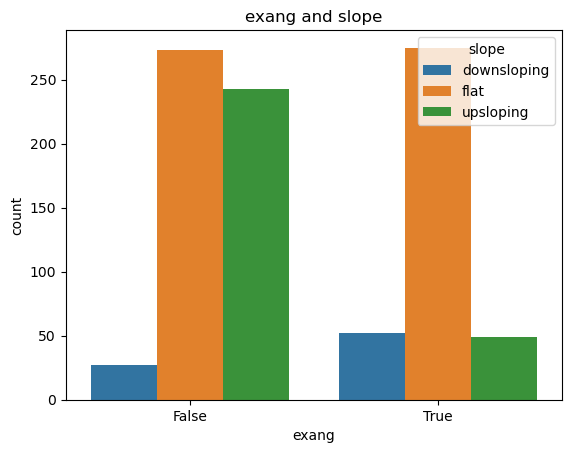

In [100]:
# plot between counts of restecg and slope
sns.countplot(data=df, x='restecg', hue='slope')
plt.title('restecg and slope')
plt.show()

# plot between counts of restecg and slope
sns.countplot(data=df, x='exang', hue='slope')
plt.title('exang and slope')
plt.show()

In [101]:
# Scatter plot for slope relation with oldpeak and talch.
px.scatter(data_frame=df, x='thalch', y='oldpeak', color='slope')

## ca column (number of major vessels (0-3) colored by fluoroscopy)
#### 0: 
No major coronary arteries have visible blockages or narrowing. This suggests that the coronary arteries are likely free of significant coronary artery disease (CAD).

##### 1: 
One of the major coronary arteries shows visible blockage or narrowing. This indicates some degree of coronary artery disease, affecting one major artery.

##### 2: 
Two major coronary arteries are affected by visible blockages or narrowing. This suggests a more extensive coronary artery disease involving two arteries.

##### 3: 
Three major coronary arteries have visible blockages or narrowing. This is indicative of widespread coronary artery disease, affecting three major arteries, and suggests a higher risk of cardiac events.

ca
0.0    653
1.0    140
2.0    105
3.0     21
Name: count, dtype: int64


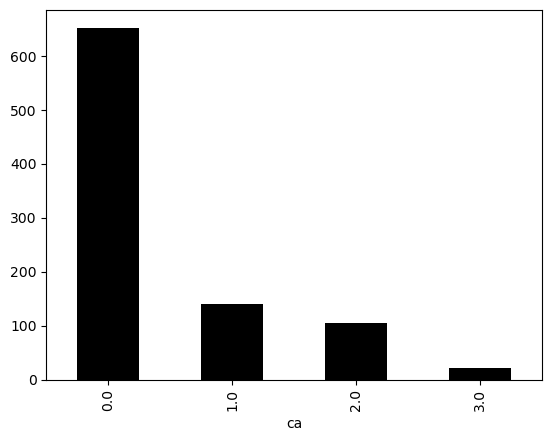

In [102]:
df['ca'].value_counts().plot(kind='bar',color='black')
print(df['ca'].value_counts())

<Axes: xlabel='ca', ylabel='count'>

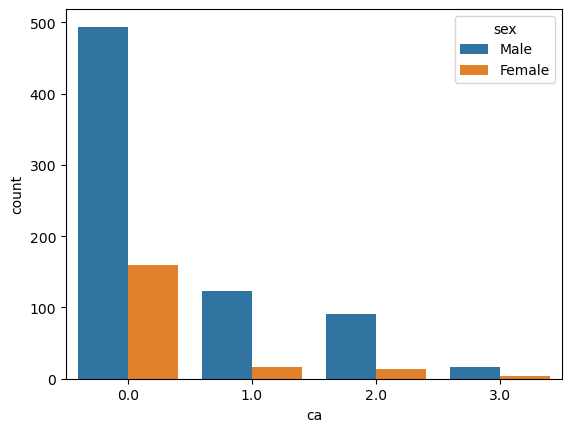

In [103]:
sns.countplot(data=df, x='ca', hue='sex')

ca   age
0.0  54     38
     51     30
     53     28
     48     28
     59     27
            ..
3.0  64      1
     52      1
     70      1
     51      1
     77      1
Name: count, Length: 122, dtype: int64


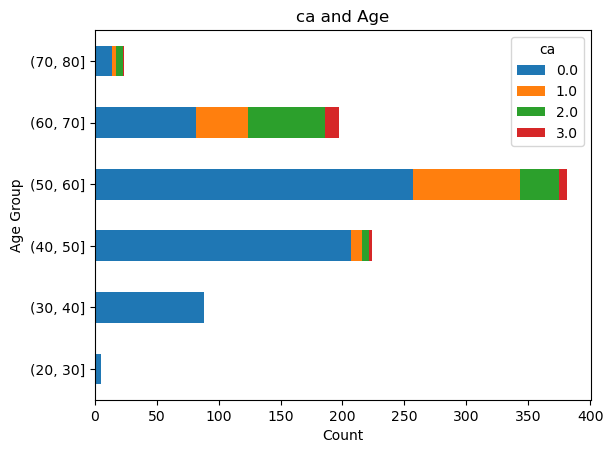

In [104]:
# Slope distribution among different age
age_slope_count= df.groupby('ca')['age'].value_counts()
print(age_slope_count)

# Plotting slope behaviour among different age groups
cross_tab= pd.crosstab(df['age_group'], df['ca'])
cross_tab.plot.barh(stacked= True)
plt.title('ca and Age')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

<Axes: xlabel='dataset', ylabel='count'>

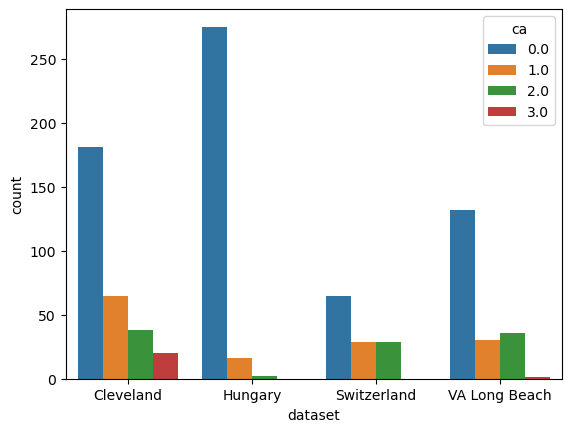

In [105]:
# dataset and ca
sns.countplot(data=df, x='dataset', hue='ca')

<Axes: xlabel='cp', ylabel='count'>

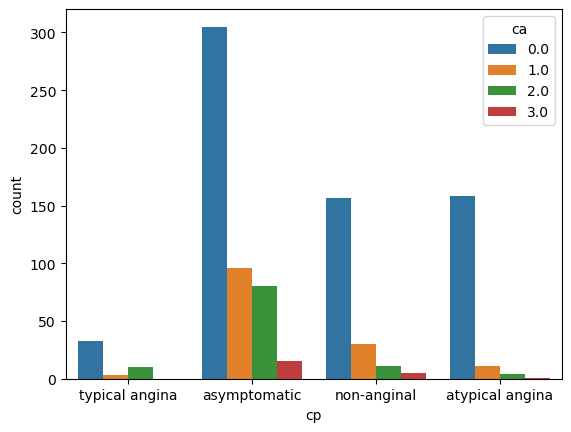

In [106]:
# cp and ca
sns.countplot(data=df, x='cp', hue='ca')

In [107]:
px.scatter(data_frame=df, x='trestbps',y='chol', color='ca')

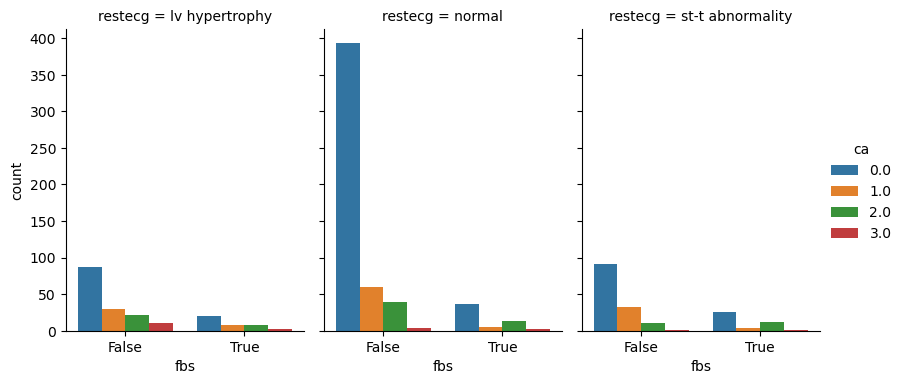

In [108]:
# Plot showing relation between ca, fbs and restecg.
sns.catplot(x='fbs', hue='ca', col='restecg', data=df, kind='count', height=4, aspect=.7)
plt.subplots_adjust(top=0.9)


In [109]:
# Plot showing relation between ca,exang and thalch.
px.scatter(data_frame=df, y='thalch', x='ca', color='exang')

<Axes: xlabel='slope', ylabel='count'>

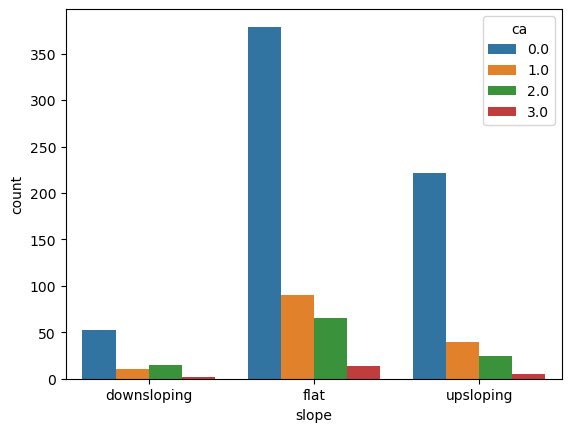

In [110]:
sns.countplot(data=df, x='slope', hue='ca')

<Axes: xlabel='ca', ylabel='oldpeak'>

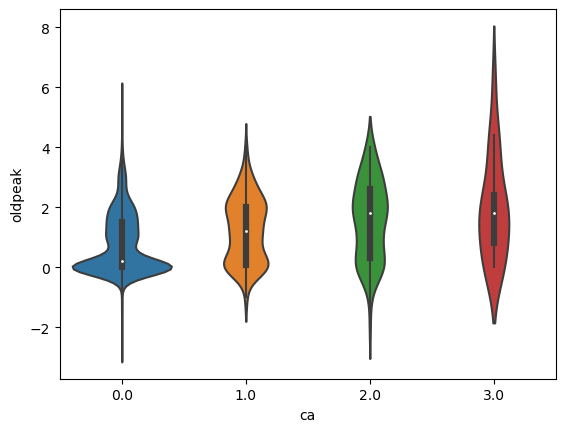

In [111]:
sns.violinplot(data=df, x='ca', y='oldpeak')

## thal column

thal
reversable defect    509
normal               341
fixed defect          69
Name: count, dtype: int64


<Axes: xlabel='thal'>

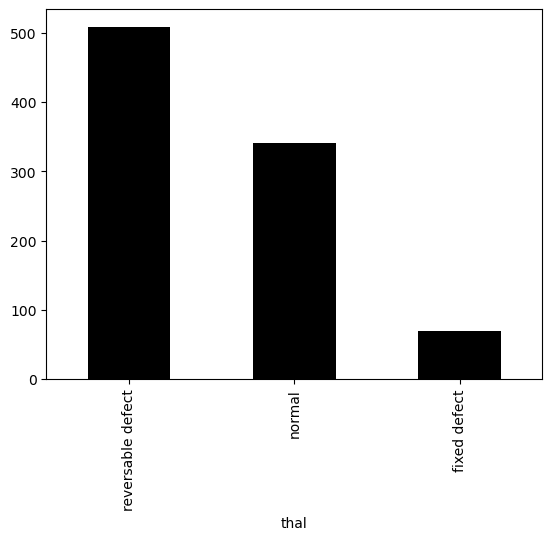

In [112]:
print(df['thal'].value_counts())
df['thal'].value_counts().plot(kind='bar', color='black')

<Axes: xlabel='thal', ylabel='count'>

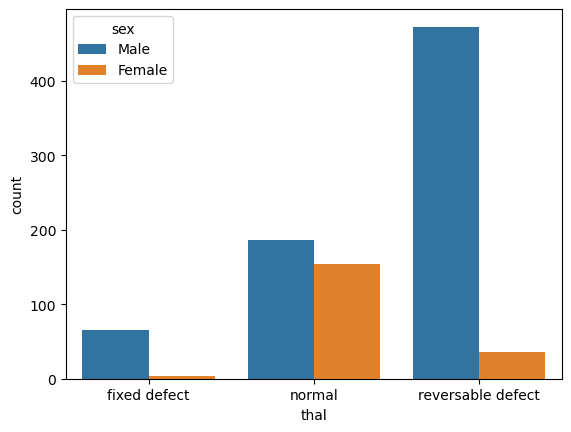

In [113]:
sns.countplot(data=df, x='thal', hue='sex')

thal               age
fixed defect       58     7
                   57     7
                   48     5
                   38     3
                   40     3
                         ..
reversable defect  31     1
                   32     1
                   34     1
                   36     1
                   77     1
Name: count, Length: 124, dtype: int64


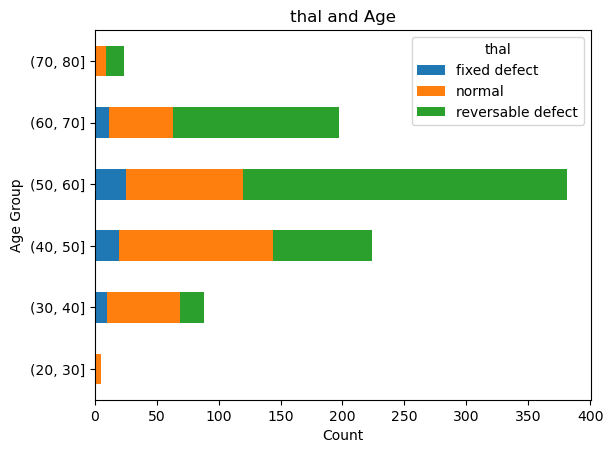

In [114]:
# thal distribution among different age
age_thal_count= df.groupby('thal')['age'].value_counts()
print(age_thal_count)

# Plotting slope behaviour among different age groups
cross_tab= pd.crosstab(df['age_group'], df['thal'])
cross_tab.plot.barh(stacked= True)
plt.title('thal and Age')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

<Axes: xlabel='cp', ylabel='count'>

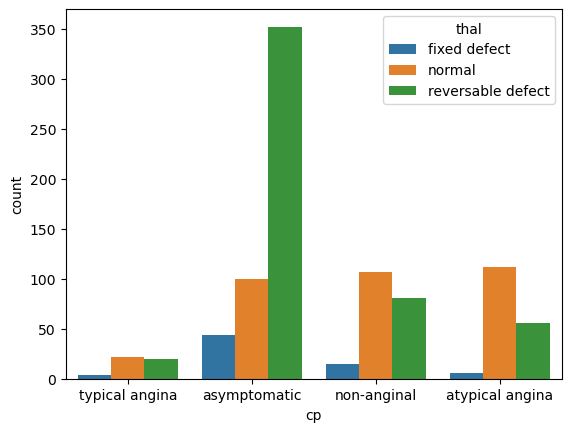

In [115]:
sns.countplot(data=df, x='cp', hue='thal')

In [116]:
px.scatter(data_frame=df, x='trestbps', y='chol', color='thal')

<Axes: xlabel='fbs', ylabel='count'>

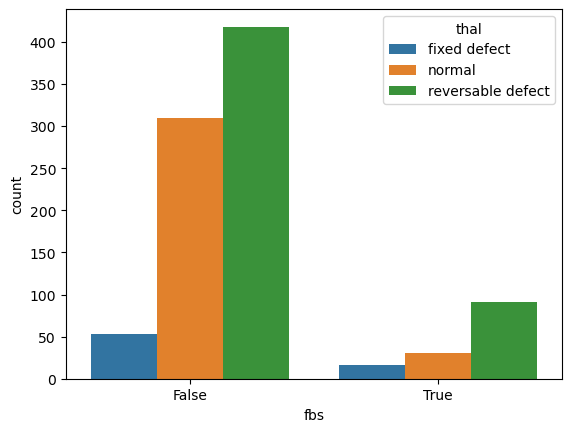

In [117]:
sns.countplot(data=df, x='fbs', hue='thal')

<Axes: xlabel='restecg', ylabel='count'>

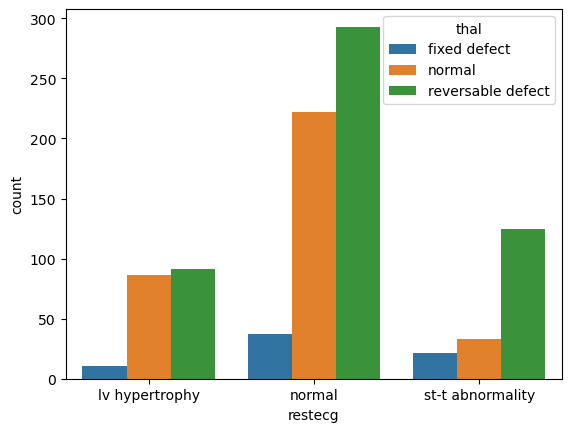

In [118]:
sns.countplot(data=df, x='restecg', hue='thal')

In [119]:
px.scatter(data_frame=df, x='thalch', y='oldpeak', color='thal')

<Axes: xlabel='exang', ylabel='count'>

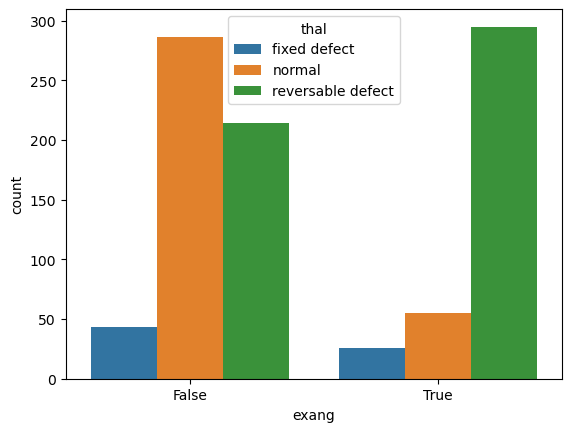

In [120]:
sns.countplot(data=df, x='exang', hue='thal')

<Axes: xlabel='slope', ylabel='count'>

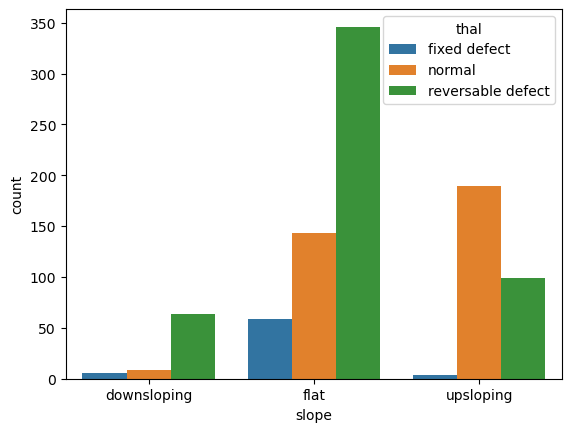

In [121]:
sns.countplot(data=df, x='slope', hue='thal')

<Axes: xlabel='ca', ylabel='count'>

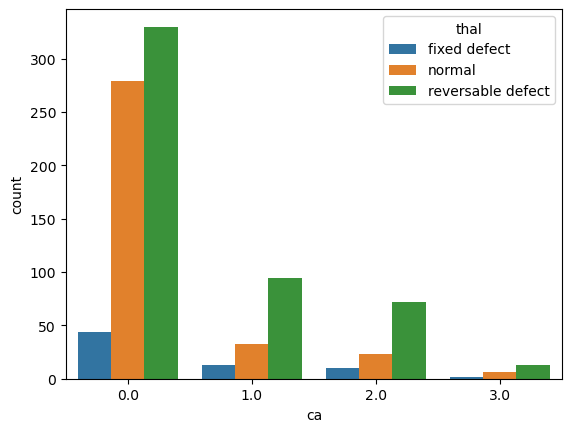

In [122]:
sns.countplot(data=df, x='ca', hue='thal')

## "Target Column"
## num column (predicted attribute)
##### 0: No heart disease
##### 1,2,3,4: Stages of heart disease

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64


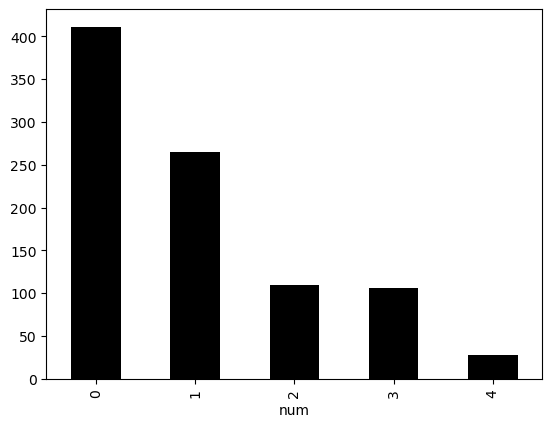

In [123]:
print(df['num'].value_counts())
df['num'].value_counts().plot(kind='bar',color='black')
plt.show()

num  age
0    54     28
     51     20
     53     18
     41     18
     52     17
            ..
4    53      1
     51      1
     38      1
     43      1
     77      1
Name: count, Length: 176, dtype: int64


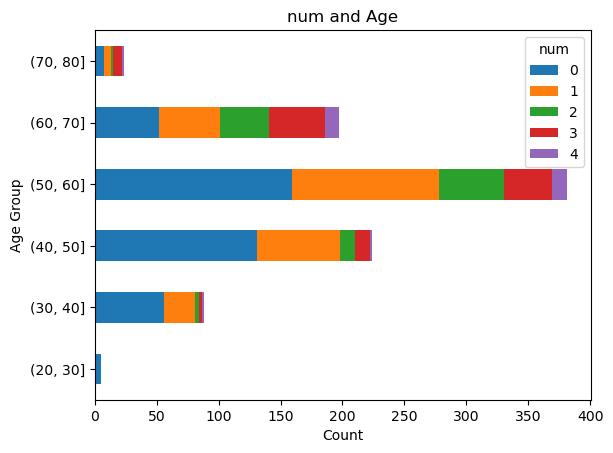

In [124]:
# thal distribution among different age
age_num_count= df.groupby('num')['age'].value_counts()
print(age_num_count)

# Plotting slope behaviour among different age groups
cross_tab= pd.crosstab(df['age_group'], df['num'])
cross_tab.plot.barh(stacked= True)
plt.title('num and Age')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

<Axes: xlabel='cp', ylabel='count'>

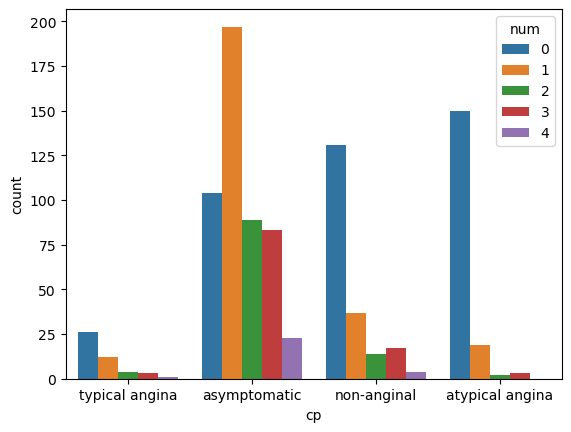

In [125]:
sns.countplot(data=df, x='cp', hue='num')

In [126]:
px.scatter(data_frame=df, x='trestbps', y='chol', color='num')

<Axes: xlabel='fbs', ylabel='count'>

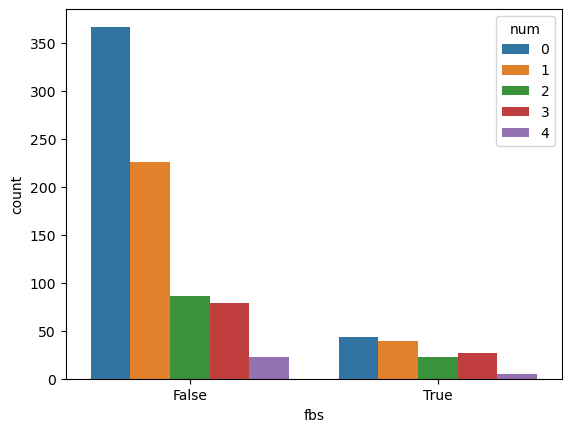

In [127]:
sns.countplot(data=df, x='fbs', hue='num')

<Axes: xlabel='restecg', ylabel='count'>

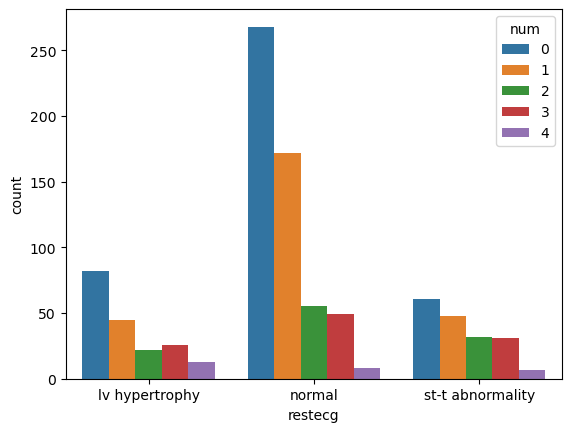

In [128]:
sns.countplot(data=df, x='restecg', hue='num')

In [129]:
px.scatter(data_frame=df, x='thalch', y='oldpeak', color='num')

<Axes: xlabel='exang', ylabel='count'>

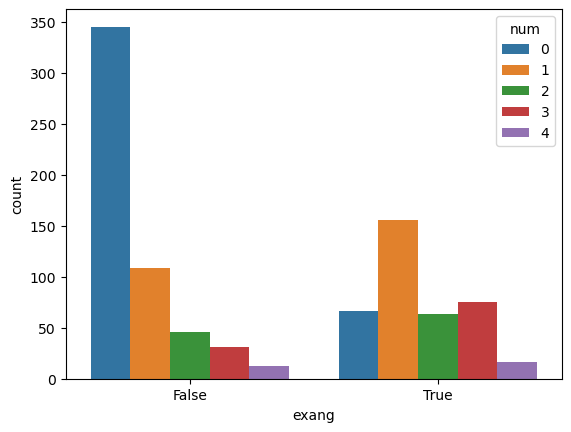

In [130]:
sns.countplot(data=df, x='exang', hue='num')

<Axes: xlabel='slope', ylabel='count'>

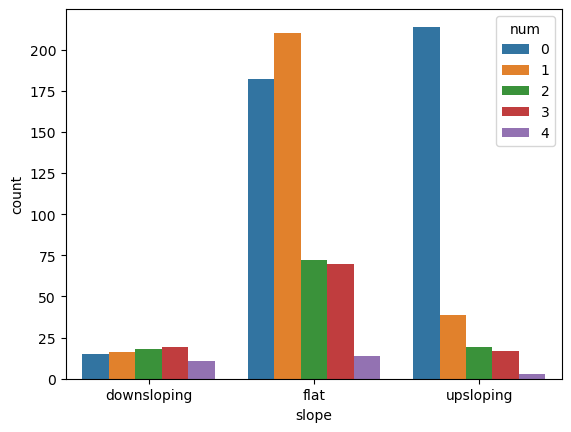

In [131]:
sns.countplot(data=df, x='slope', hue='num')

<Axes: xlabel='ca', ylabel='count'>

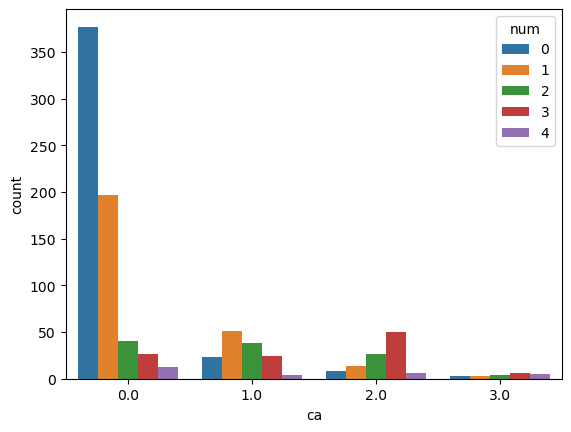

In [132]:
sns.countplot(data=df, x='ca', hue='num')

<Axes: xlabel='thal', ylabel='count'>

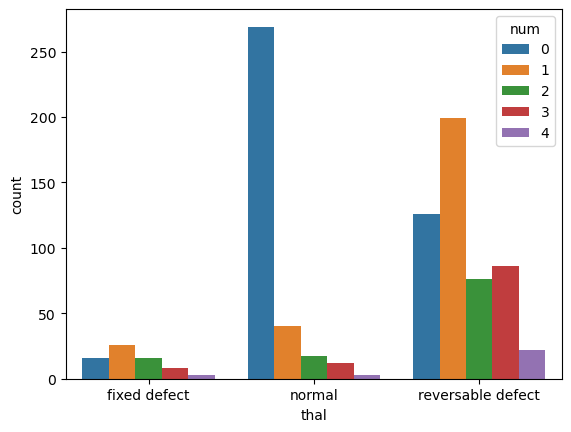

In [133]:
sns.countplot(data=df, x='thal', hue='num')

# Information extracted from EDA
* The age of the patients are in between 28 and 77.
* The maximum patients are in between age 50-60.
* Most of the people got heart disease at age between 54-55.
* 70 male and 22 female patients are in between age 54-55.
* Male patients in percentage are 78.91%.
* Female patients in percentage are 21.09%.
* Males patients are 2.74 times greater than female.
* Cleveland got highest no of patients with 33% of total and 304 in number.
* Switzerland highest no of patients with 13.4% of total and 123 in number.
* Hungary got most number of Male patients (212) and Switzerland have least number of male patients (113).
* Cleveland got most number of female patients (97) and VA Long Beach have least number of female patients (06).
* Asymptomatic chest pain are highest in number i.e 496 of total.
    * Asymptomatic pain is higher in cleveland where it is lowest in Switzerland.
    * Asymptomatic chest pain is highest in the age group of 56-57 and it is lowest in 30-31.
* Typical angina is lowest in number i.e 46 of total.
    * Typical Angina is highest in Cleveland.
    * Typical Angina is highest in age group of 62-63.
* Atypical Angina is highest in Hungary.
    * Atypical Angina is highest in age group of 54-55 and lowest in 30-31.
    * No Atypical Agina is recorded in age group of 64-65 and 72-73.
* On checking the outlier of trestbps column, we got one outlier i.e 0, so we removed it.
* In chol column, we got 171 '0' values but they are not outliers.
* As the chol column have around 171 '0' values and only 8 female patients got 0 cholesterol.
* All patients of Switzerland got '0' cholesterol.
* Mostly patients having age between 50-70 got diabetes.
* None of patiensts between 20-30 age do not have diabetes.
* Small number of patients (138) got diabetes.
* 60% patients restecg results are normal.
* ECG results has nothing to do with age.
* 59% of the patients do not have the exercise induced agina.
* Patients having chest pain type (asymptomatic) have higher exercise induced agina.
* VA Long Beach patients have higher number of exercise induced agina.
* Patients with age greater than 40 has most of the exercise induced agina.
* Most of the patients i.e almost 40% have normal oldpeak values.
* Only male patients got oldpeak values in negative.
* Mostly patients of age greater than 40 have oldpeak value greater than 1.
* Most of the patients having exang true has oldpeak value higher than 1.
* Most of the patients got flat slope.
* No downsloping is noticed in any patient of age lower than 40.
* Patients with cp (asymptomatical) have flat slope.
* Most of the downsloping is noticed where patient got high cholesterol level and high blood pressure.
* Patients with exang (True) has higher number of flat slope.
* All patients with age less than 40 got ca='0'.
* Only cleaveland patients got ca='3'.
* Patients with typical angina do not have ca='3'.
* Patients with restecg (normal) and fbs (false) has higher number of ca='0'.
* Patients with flat slope has highest number of ca='0'.
* Patients having oldpeak value equals to almost '0' have most ca='0'.
* Male patients got highest number of thal (reversible defect).
* Patients from age 50-70 got highest number of thal (reversible defect).
* Patients having asymptomatic chest pain have highest number of thal (reversible defect).
* Patients with lower trestbps have more thal (normal).
* Patients with fbs (false) have higher thal affects.
* Patients with normal restecg have highest number of thal(reversible defect).
* Patients with exang (true) have highest number of thal(reversible defect).
* Patients having flat slope have highest number of thal(reversible defect).
* Patients with ca='0' have highest number of thal (normal) and thal (reversible defect).
* Higher number of patients have predicted attribute '0'.
* Very few patients have predicted attribute '0'.
* Patients with non anginal and atypical angina have higest number of predicted attribute '0'.
* Patients with fbs (false) have highest number of predicted attribute '0' and '1'.
* Patients with normal restecg has highest number of predicted attribute '0' and '1'.
* Most of the patients having predicted attribute '4' have higher oldpeak value.
* Patients with exang (true) have higher number of predicted attribute '1'.
* Patients with exang (false) have higher number of predicted attribute '0'.
* Patients with flat sloping have higher number of predicted attribute '1'.
* Patients with unsloping have higher number of predicted attribute '1'.
* Patients with ca='0' have higher number of predicted attribute '0' and '1'.
* Patients with normal thal have higher number of predicted attribute '0'.
* Patients with reversible defect have higher number of predicted attribute '1', '2', '3' and '4'.

---

# Machine Learning

In [134]:
# dropping age_group and color column
df= df.drop(['age_group', 'color'], axis= 1)

#### Exploring dataset

In [135]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [136]:
# Splitting the data into 'X' and 'y'
X= df.drop('num', axis=1) # Features
y= df['num'] # Target

# ecoding features by using separate label encoder
label_encoder= LabelEncoder()

for col in X.columns:
    if X[col].dtype=='object' or X[col].dtype== 'category':
        X[col]= label_encoder.fit_transform(X[col])
    else:
        pass


# splitting the data into train test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

##### Enlist all the models that is used in prediction.
* Logistic Regression
* KNN
* Decision Tree
* SVM
* Random Forest
* XGBoost
* AdaBoost
* GradientBoost classifier
* lightGBM

In [137]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# import pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [138]:
import warnings
warnings.filterwarnings('ignore')

# Create a list of models to evaluate
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbor', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('LGBM Classifier', LGBMClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Naive bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: LogisticRegression
Cross-validation Accuracy: 0.5210884353741496
Test Accuracy: 0.4891304347826087

Model: K-Nearest Neighbor
Cross-validation Accuracy: 0.5850340136054422
Test Accuracy: 0.592391304347826

Model: Support Vector Machine
Cross-validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348



Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdul\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\abdul\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>


Model: AdaBoost Classifier
Cross-validation Accuracy: 0.6136054421768707
Test Accuracy: 0.5706521739130435

Model: Decision Tree
Cross-validation Accuracy: 0.6095238095238095
Test Accuracy: 0.6086956521739131

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 15
[LightGBM] [Info] Start training from score -0.785740
[LightGBM] [Info] Start training from score -1.276861
[LightGBM] [Info] Start training from score -2.142620
[LightGBM] [Info] Start training from score -2.172034
[LightGBM] [Info] Start training from score -3.380995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

  File "C:\Users\abdul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Saving the best model

In [139]:
print(f"Our best model is:\n{best_model}.")

Our best model is:
Pipeline(steps=[('model', RandomForestClassifier(random_state=42))]).


In [140]:
# import library
from joblib import dump

In [141]:
dump(best_model, 'heart_disease_model.joblib')